 <font size='8px'><font color='#E5AB00'>**Project Name**    - <font color='#3792cb'>Bike Demand Prediction

 ***Project Type - Regression (Supervised_Learning)***

 ***Contribution - Individual***

 ***By*** **-**  ***Suman Sadhukhan***

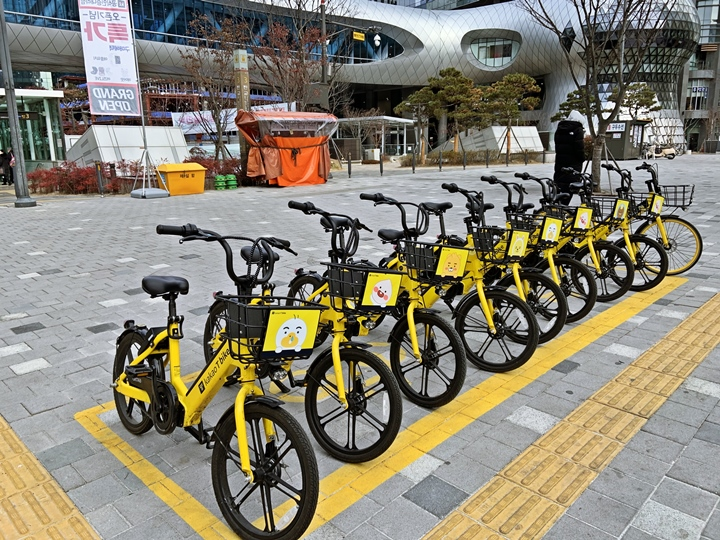

# **Project Summary -**




This project aims to develop a machine learning (ML) regression model to predict the final demand for bikes. Historical data on bike rentals and environmental factors will be utilized to create a model that optimizes inventory management and enhances customer satisfaction in the bike rental industry. By accurately predicting bike demand, this ML regression project aims to support bike rental companies in optimizing inventory management, reducing costs, and delivering better customer service. The insights gained from the project will enable data-driven decisions, such as adjusting rental prices, resource allocation, and improving overall operational efficiency.

# **GitHub Link -**

**https://github.com/techysuman27/Regression---Bike-Sharing-Demand-Prediction**

# **Problem Statement**


The problem that this project aims to solve is to accurately forecast the demand for bikes in a given time period for a bike rental company. Accurate demand prediction is crucial for bike rental companies, as it allows them to optimize their inventory and pricing strategies in order to meet the needs of their customers. However, predicting bike demand can be challenging due to the influence of various factors, including the time and date of the rental, weather conditions, and local events. By developing a machine learning model that can accurately predict bike demand, bike rental companies can make more informed decisions about how to allocate their resources and serve their customers.

> My goal was to develop a model that is highly accurate, with a low mean absolute error and a high R-squared value. The model should also be able to provide insights into the factors that most impact bike demand, helping the bike sharing company to make data-driven decisions about how to optimize their operations

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [132]:
# Import Libraries
#data visualization libraries(matplotlib,seaborn, plotly)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing numpy, pandas and tensorflow
import pandas as pd
import numpy as np

# setting max display column limit to 20
pd.set_option("display.max_columns", 20)
# The following lines adjust the granularity of reporting.
pd.options.display.float_format = "{:.2f}".format

#set style
plt.style.use('seaborn')


# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
from scipy.stats import norm
from scipy import stats

# Datetime library for manipulating Date columns.
from datetime import datetime as dt
import calendar

# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more
# suitable for the downstream estimators.
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import  LabelEncoder

# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# spilitting data
from sklearn.model_selection import train_test_split

#for optimization
from sklearn.model_selection import GridSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

# For Model Explainability
!pip install shap
import shap

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [133]:
#mouting google drive to get data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
# CSV file loaction path
file_path= "/content/drive/MyDrive/AlmaBetter /Module 6/Capstone Project/SeoulBikeData.csv"

In [135]:
# Reading CSV file.
bike_df= pd.read_csv(file_path,encoding="latin")

### Dataset First View

In [136]:
# Dataset First Look
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0            -5.20           37   
1  01/12/2017                204     1            -5.50           38   
2  01/12/2017                173     2            -6.00           39   
3  01/12/2017                107     3            -6.20           40   
4  01/12/2017                 78     4            -6.00           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0              2.20              2000                     -17.60   
1              0.80              2000                     -17.60   
2              1.00              2000                     -17.70   
3              0.90              2000                     -17.60   
4              2.30              2000                     -18.60   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                     0.00          0.00           0.00  Winter  No Holiday   
1                     0.00          0.00           0.00  Winter  No Holiday   
2                     0.00          0.00           0.00  Winter  No Holiday   
3                     0.00          0.00           0.00  Winter  No Holiday   
4                     0.00          0.00           0.00  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [137]:
# Check last 5 rows
bike_df.tail(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19             4.20           34   
8756  30/11/2018                764    20             3.40           37   
8757  30/11/2018                694    21             2.60           39   
8758  30/11/2018                712    22             2.10           41   
8759  30/11/2018                584    23             1.90           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755              2.60              1894                     -10.30   
8756              2.30              2000                      -9.90   
8757              0.30              1968                      -9.90   
8758              1.00              1859                      -9.80   
8759              1.30              1909                      -9.30   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                     0.00          0.00           0.00  Autumn   
8756                     0.00          0.00           0.00  Autumn   
8757                     0.00          0.00           0.00  Autumn   
8758                     0.00          0.00           0.00  Autumn   
8759                     0.00          0.00           0.00  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [138]:
# Dataset Rows(Observation) & Columns(Feature) count

print(f'Total observation and feature: {bike_df.shape}')

Total observation and feature: (8760, 14)


### Dataset Information

In [139]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [140]:

# Dataset Duplicate Value Count
print(f"Data is duplicated ? {bike_df.duplicated().value_counts()},unique values with {len(bike_df[bike_df.duplicated()])} duplication")

Data is duplicated ? False    8760
Name: count, dtype: int64,unique values with 0 duplication


#### Missing Values/Null Values

In [141]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

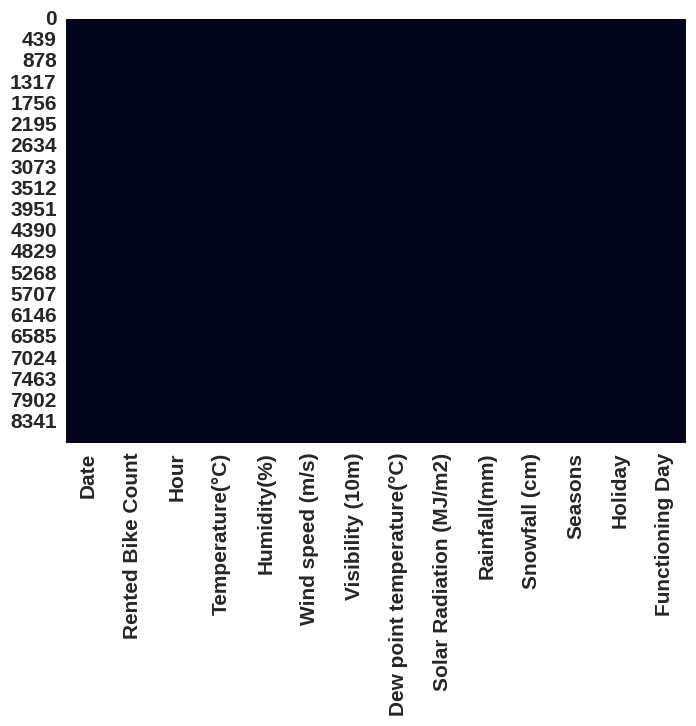

In [142]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(bike_df.isnull(), cbar=False);

### What did you know about your dataset?

* There are 8760 observation and 14 features.
* There is no null values.
* Dataset has all unique values i.e., there is no duplicate which means data is free from bias as duplicates can cause problems in downstream analyses, such as biasing results or making it difficult to accurately summarize the data.
* Date has object data type it should be datetime data type.

## ***2. Understanding Your Variables***

In [143]:
# Dataset Columns
print(f'Features: {bike_df.columns.to_list()}')

Features: ['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [144]:
# Dataset Describe
bike_df.describe()

Rented Bike Count    Hour  Temperature(°C)  Humidity(%)  \
count            8760.00 8760.00          8760.00      8760.00   
mean              704.60   11.50            12.88        58.23   
std               645.00    6.92            11.94        20.36   
min                 0.00    0.00           -17.80         0.00   
25%               191.00    5.75             3.50        42.00   
50%               504.50   11.50            13.70        57.00   
75%              1065.25   17.25            22.50        74.00   
max              3556.00   23.00            39.40        98.00   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count           8760.00           8760.00                    8760.00   
mean               1.72           1436.83                       4.07   
std                1.04            608.30                      13.06   
min                0.00             27.00                     -30.60   
25%                0.90            940.00                      -4.70   
50%                1.50           1698.00                       5.10   
75%                2.30           2000.00                      14.80   
max                7.40           2000.00                      27.20   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count                  8760.00       8760.00        8760.00  
mean                      0.57          0.15           0.08  
std                       0.87          1.13           0.44  
min                       0.00          0.00           0.00  
25%                       0.00          0.00           0.00  
50%                       0.01          0.00           0.00  
75%                       0.93          0.00           0.00  
max                       3.52         35.00           8.80

### Variables Description

*   **Date** - Date(year-month-day)
*   **Rented_Bike_Count** - Count of bikes rented at each hour
*   **Hour** - Hour of the day(0-23)
*   **Temperature** - Temperature for the day
*   **Humidity** - Humidity Measure
*   **Windspeed** - Windspeed
*   **Visibility** - Visibility Measure
*   **Dew point temperature** - Dew Point Measure
*   **Solar radiation** - Solar Radiation Measure
*   **Rainfall** - Rainfall in mm
*   **Snowfall** - Snowfall in cm
*   **Seasons** - Season Name
*   **Holiday** - Whether Holiday or Not
*   **Functional Day** - Functional Day or Not

### Check Unique Values for each variable.

In [145]:
# Check Unique Values for each variable.
# bk_data.nunique()
for i in bike_df.columns.tolist():
  print(f"No. of unique values in {i} is {bike_df[i].nunique()}.")

No. of unique values in Date is 365.
No. of unique values in Rented Bike Count is 2166.
No. of unique values in Hour is 24.
No. of unique values in Temperature(°C) is 546.
No. of unique values in Humidity(%) is 90.
No. of unique values in Wind speed (m/s) is 65.
No. of unique values in Visibility (10m) is 1789.
No. of unique values in Dew point temperature(°C) is 556.
No. of unique values in Solar Radiation (MJ/m2) is 345.
No. of unique values in Rainfall(mm) is 61.
No. of unique values in Snowfall (cm) is 51.
No. of unique values in Seasons is 4.
No. of unique values in Holiday is 2.
No. of unique values in Functioning Day is 2.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [146]:
# Write your code to make your dataset analysis ready.
#converting few names for convenience
df = bike_df.copy()   #keeping orginla data safe
df.rename({"Temperature(°C)": "Temperature",
               "Functioning Day":"Functioning_Day",
                "Humidity(%)": "Humidity",
                "Wind speed (m/s)": "Wind_speed",
                "Visibility (10m)": "Visibility",
                "Dew point temperature(°C)": "Dew_point_temperature",
                "Solar Radiation (MJ/m2)": "Solar_Radiation",
                "Snowfall (cm)": "Snowfall",
                "Rainfall(mm)": "Rainfall",
                "Rented Bike Count": "Rented_Bike_Count"},
                axis = "columns", inplace = True)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [148]:
import pandas as pd
import calendar

# Convert the 'Date' column to datetime format
df['Date'] = df['Date'].apply(lambda x: dt.strptime(x, "%d/%m/%Y"))


#Extract features from the 'Date' column
#Extracting month from date column
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
#Extracting day name from date
df['Day'] = df['Date'].dt.day_name()

#creating a new column of "weekdays_weekend"
df['Weekdays_Weekend']= df['Day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

#Extracting year
df['Year'] = df['Date'].dt.year

# Drop the original 'Date' column as we have extracted relevant features
df.drop('Date', axis=1, inplace=True)

In [149]:
# Convert categorical columns to categorical data type
categorical_columns = ['Hour','Year','Seasons', 'Holiday', 'Functioning_Day','Month','Day','Weekdays_Weekend']
df[categorical_columns] = df[categorical_columns].astype('category')

In [150]:
#Get distinct categories counts forSeasons categories
df['Seasons'].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [151]:
#Get distinct categories counts for Holiday categories
df['Holiday'].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [152]:
#Get distinct categories counts for Functioning_Day categories
df['Functioning_Day'].value_counts()

Functioning_Day
Yes    8465
No      295
Name: count, dtype: int64

In [153]:
#Get distinct categories counts for for Month categories
df['Month'].value_counts()

Month
Aug    744
Dec    744
Jan    744
Jul    744
Mar    744
May    744
Oct    744
Apr    720
Jun    720
Nov    720
Sep    720
Feb    672
Name: count, dtype: int64

In [154]:
#Get distinct categories counts for for Weekdays_or_weekend categories
df['Weekdays_Weekend'].value_counts()

Weekdays_Weekend
0    6264
1    2496
Name: count, dtype: int64

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   category
 11  Holiday                8760 non-null   category
 12  Functioning_Day        8760 non-null   category
 13  Month                  8760 non-null   category
 14  Day                    8760 non-null   c

### What all manipulations have you done and insights you found?

* Date Transformation: Converted the 'Date' column to datetime format, enabling
better temporal analysis.

* Feature Extraction: Extracted additional features such as 'year',Month,' 'Day,' and 'Weekday' from the 'Date' column, facilitating more granular time-based insights.

* Column Removal: Dropped the original 'Date' column as the relevant features were extracted, reducing redundancy in the dataset.

* Categorical Conversion: Converted categorical columns from object data type ('Seasons,' 'Holiday,' 'Functioning Day','month') to the categorical data type, improving efficiency and allowing for categorical analysis. As "Hour","weekdays_weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.
Categorical data take less memory and the processing speed is faster then object or int data type.

* Modified DataFrame: Displayed the head of the modified DataFrame, showcasing the transformed dataset with added features for further analysis.

* Insights:

Temporal insights can now be derived with the added 'Year','Month','Day,' and 'Weekday' features. Categorical columns are now more memory-efficient and suitable for categorical analysis. The dataset is prepared for exploration and modeling, with enhanced features and reduced redundancy.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Exploratory Data Analysis Of The Data Set**

**Why do we perform EDA?**
* ***An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.***

#### **Analysis of Dependent Variable:**

**What is a dependent variable in data analysis?**
* ***we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.In this dataset, the dependent variable is "Rented Bike Count"***

###**Univariate**

**Why do you do univariate analysis?**
* Univariate analysis explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own.
The key objective of Univariate analysis is to simply describe the data to find patterns within the data.

In [156]:
#storing numerical feature in separate variable
#Return a subset of the DataFrame’s columns based on the column dtypes
num_feature = df.select_dtypes(exclude=['object','category'])
print(f'Numerical feature : {num_feature.columns.to_list()}')

#storing categorial feature in separate variable
#Pandas isin() method is used to filter data frames using boolean value true of false
#Tilde sign (~)works as a negation operator i.e reverse true to false and false to true
cat_feature = df.loc[:,  ~df.columns.isin(num_feature.columns.to_list())]
print(f'Categorical feature : {cat_feature.columns.to_list()}')

Numerical feature : ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall']
Categorical feature : ['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Day', 'Weekdays_Weekend', 'Year']


#### **Chart - 1 ---> Understanding the distributions**

**Analyze of Numerical variables:**

What is Numerical Data?

* Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.

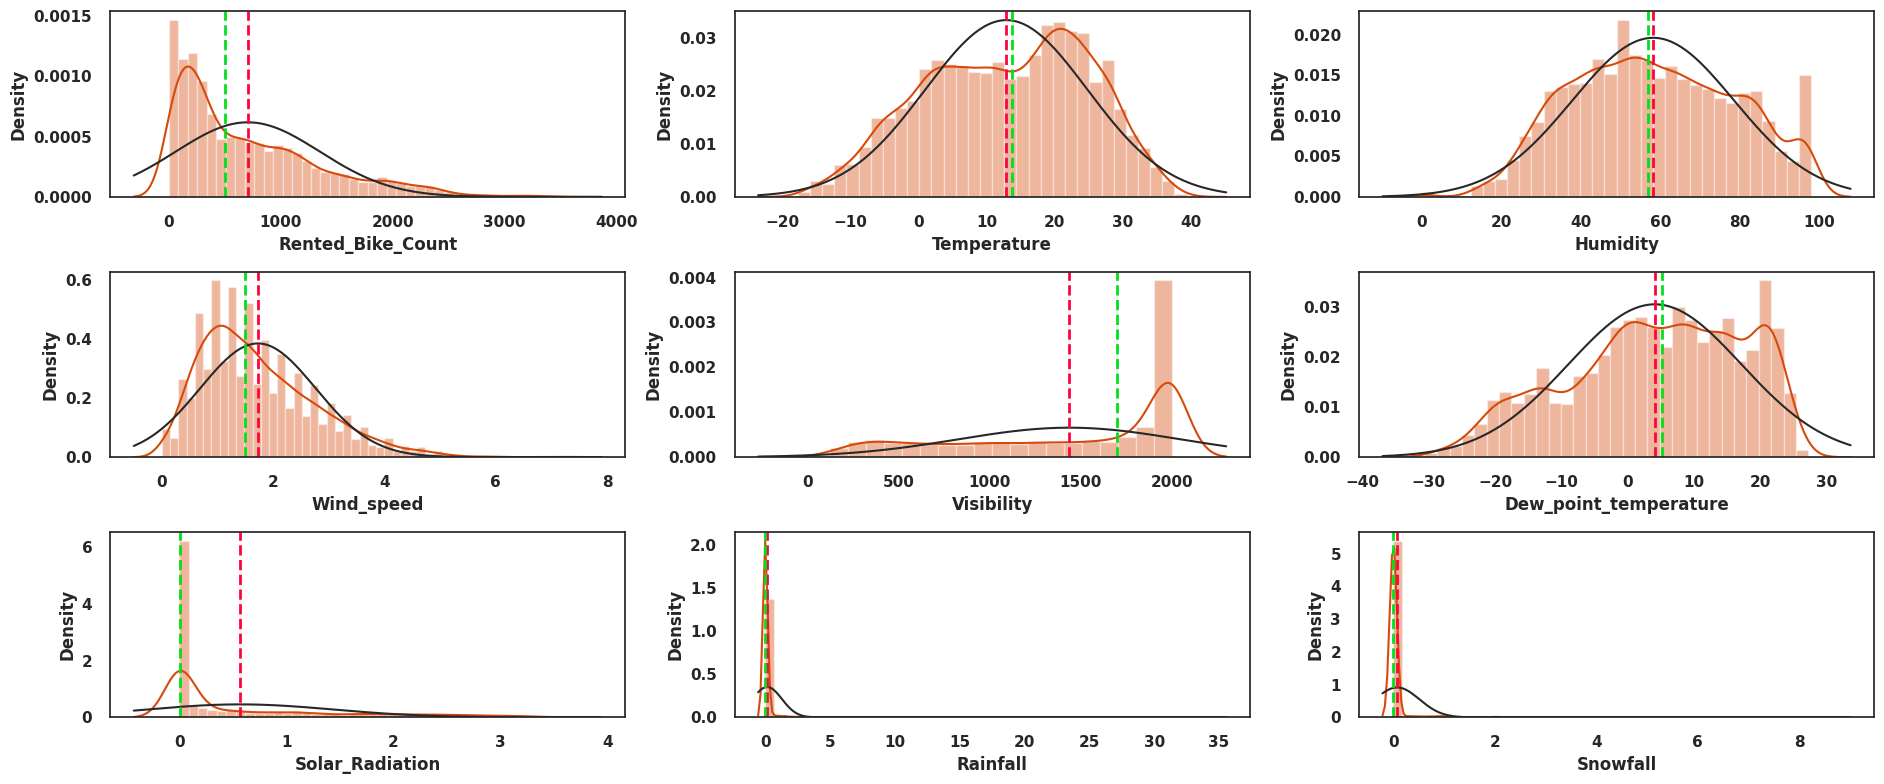

In [157]:
def density_plot(dfr,num_feature):
  graph = plt.figure(figsize = (19,8))
  for i,col in enumerate(num_feature) :
    sns.set_style("white")
    sns.set_context("notebook");
    plt.subplot(3,3,i+1);
    sns.distplot(df[col], color = '#D64A0C', fit = norm);
    feature = dfr[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=2,label= 'mean');  #red
    plt.axvline(feature.median(), color='#02e01c', linestyle='dashed', linewidth=2,label='median'); #green
    plt.tight_layout();
#graph to analyse distribution of different numerical features
density_plot(df,num_feature)

##### 1. Why did you pick the specific chart?

In order to understand the distribution for each feature, I plotted distplot along with its mean and median. Distplot is shows both histogram and kde plot and is best suited for continous data.

##### 2. What is/are the insight(s) found from the chart?

  **Right**/Positive Skewed Distribution: Mode < Median < Mean: **Rented_Bike_Count**, **Wind_speed**, **Solar Radiation**,**Rainfall**,**Snowfall**

  **No Skew (Normal)**: Mean = Median = Mode : **Temperature**, **Humidity**

  **Left**/Negative Skewed Distribution: Mean < Median < Mode: **visibility**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In this context it can not define any business impact. It's done just to see the distribution of the column data over the dataset.

#### Chart - 2

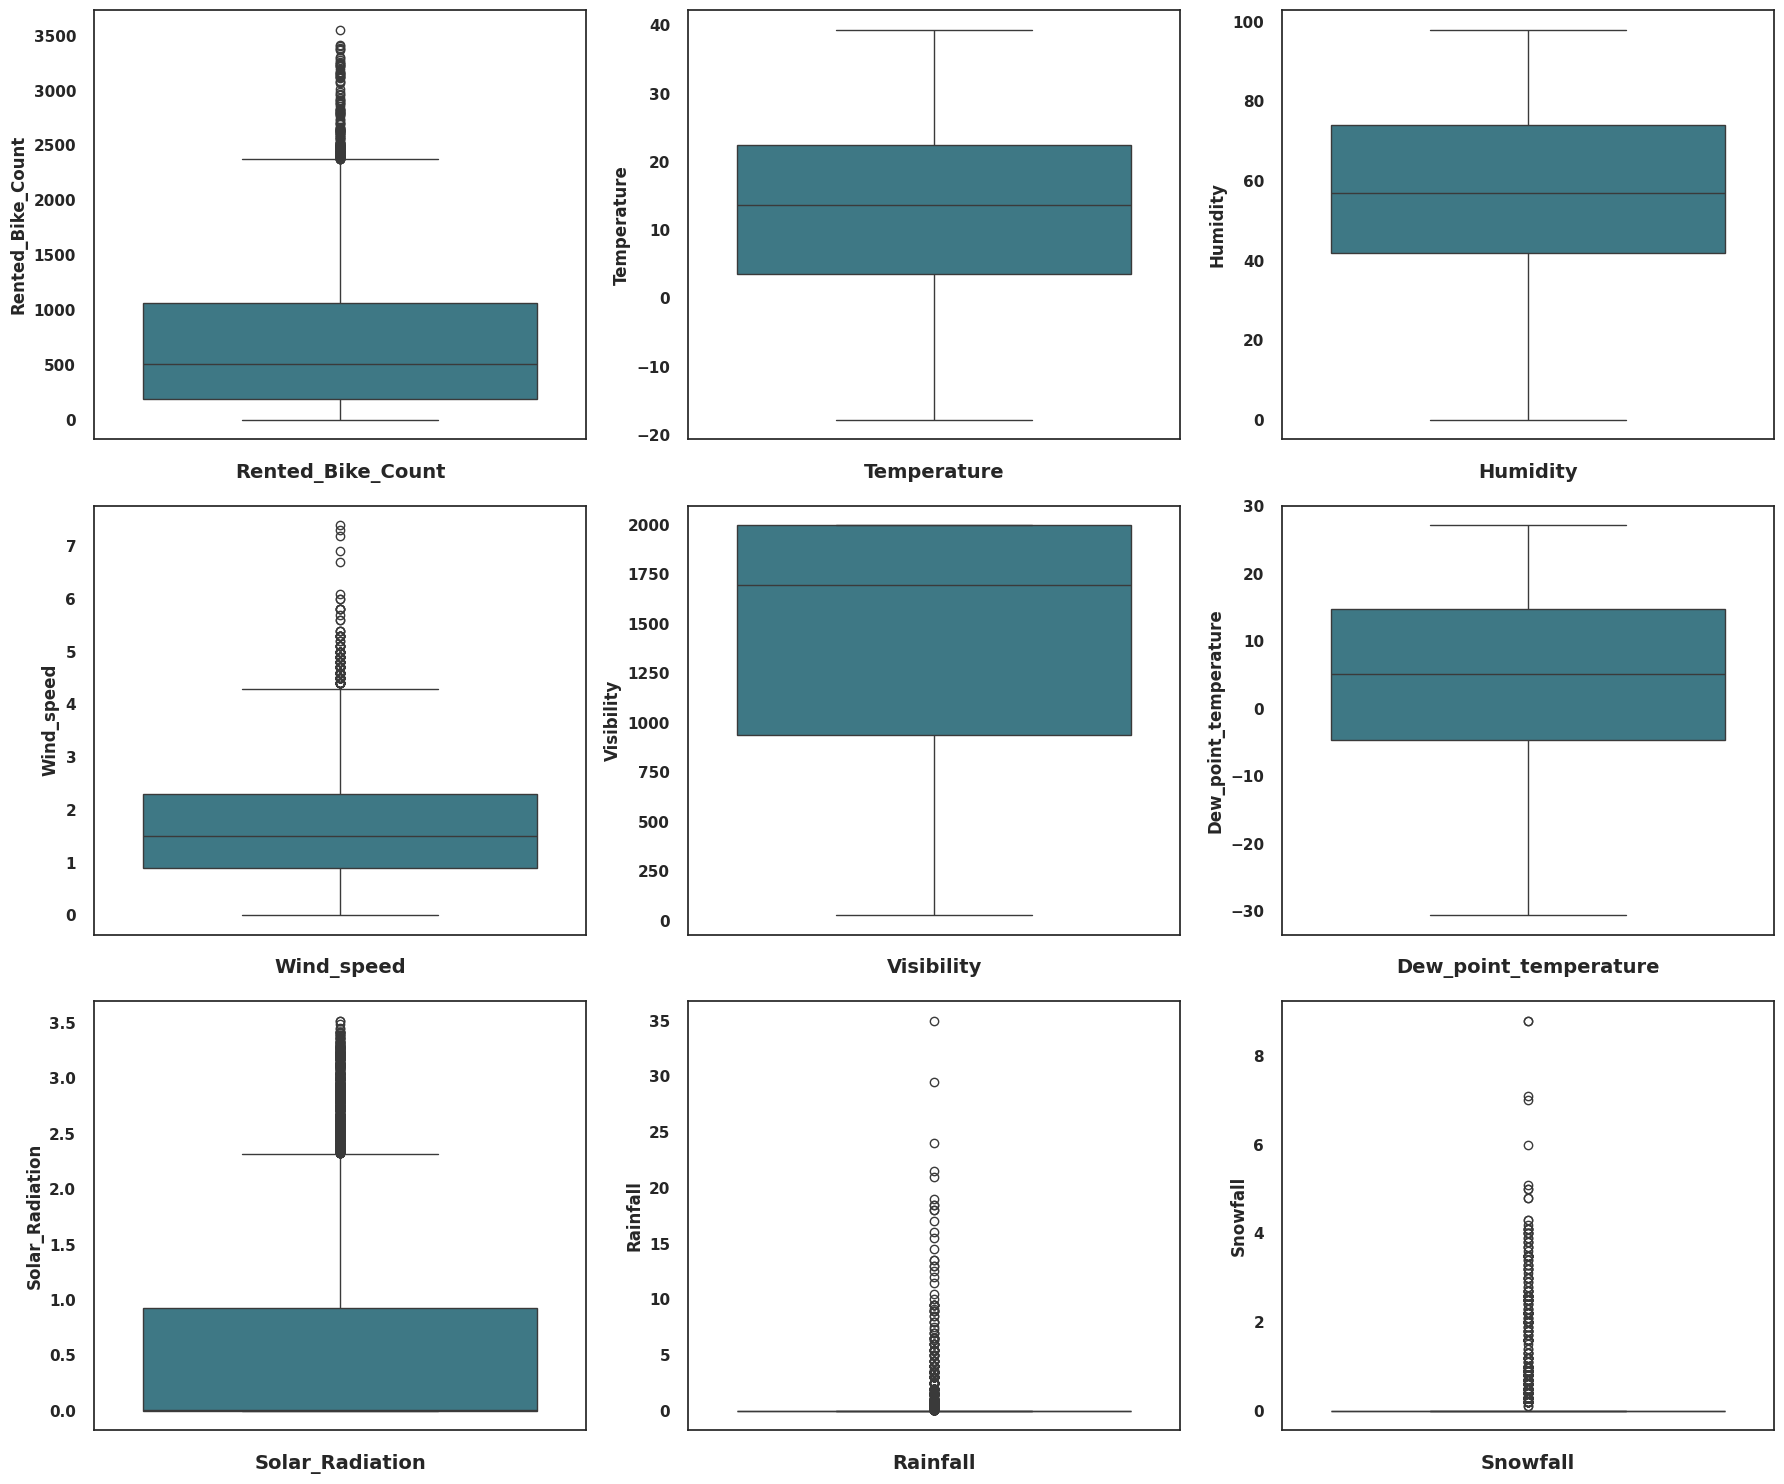

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_plot(df, feature):
    plt.figure(figsize=(18, 15))
    for i, col in enumerate(feature.columns):
        if df[col].dtypes == 'category':
            plt.subplot(3, 3, i + 1)
            sns.boxplot(x=df[col], y=df["Rented_Bike_Count"], color = '#E74061')
            plt.xticks(fontsize=12, rotation=45)
            plt.xlabel(col, fontsize=14)
            plt.ylabel("Rented_Bike_Count", fontsize=14)
            plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust horizontal and vertical space between subplots
        else:
            plt.subplot(3, 3, i + 1)
            sns.boxplot(df[col], color = '#327F91')
            plt.xlabel(col, fontsize=14)
            plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust horizontal and vertical space between subplots
    plt.tight_layout()

box_plot(df, num_feature)
plt.show()


##### 1. Why did you pick the specific chart?

Box plot help in Visualization of outliers, distribution of median.

##### 2. What is/are the insight(s) found from the chart?

In rented bike count feature there are few points accumulated above maximum range.
Feature like snowfall and rainfall show sparse data as there are more number of values which is zero i.e., upto 75 quartile.

###**Bivariate**

**Bivariate analysis refers to the analysis of two variables to determine relationships between them.**

####**Analysation of categorical variables**

* ***Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.First we analyze the category data type then we proceed with the numerical data type in the Bivariate analysis.***

#### Chart - 3 ---> *How the Rented Bike Count is related to Months?*

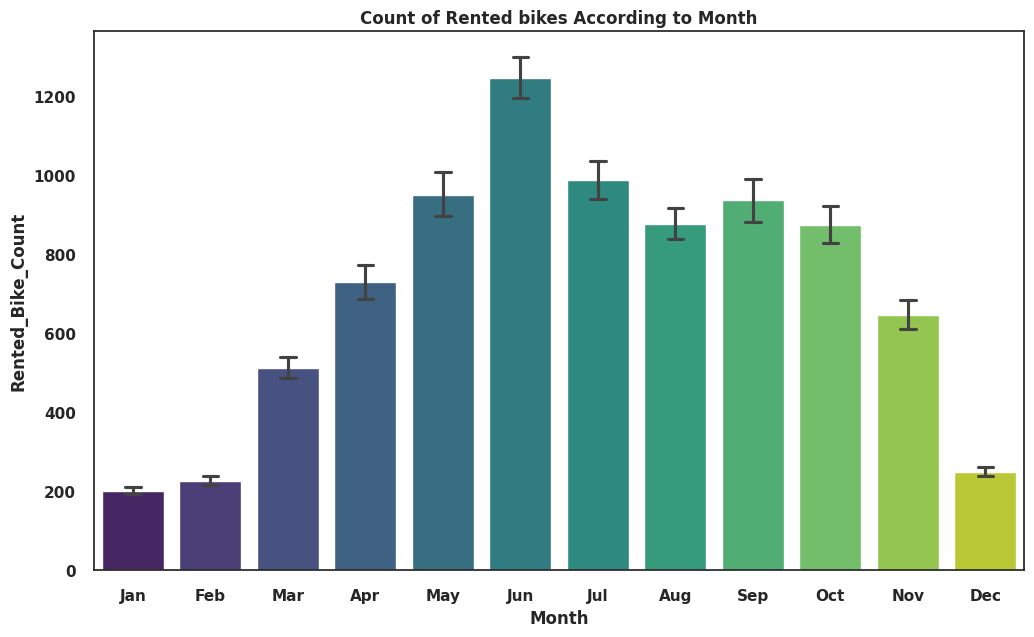

In [159]:
# Chart - 3 visualization code
#anlysis of data by vizualisation
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot the barplot with sorted months
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data=df, x='Month', y='Rented_Bike_Count', order=month_order, palette="viridis", ax=ax, capsize=.2)
ax.set(title='Count of Rented bikes According to Month')
plt.show()

#####What is/are the insight(s) found from the chart?

**From the above bar plot we can clearly say that, from the month 5 to 10 (May - October) the demand of the rented bike is high as compare to other months.These months came inside the summer season.**

#### **Chart - 4 ---> Rented Bike Count in weekdays &weekend**

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

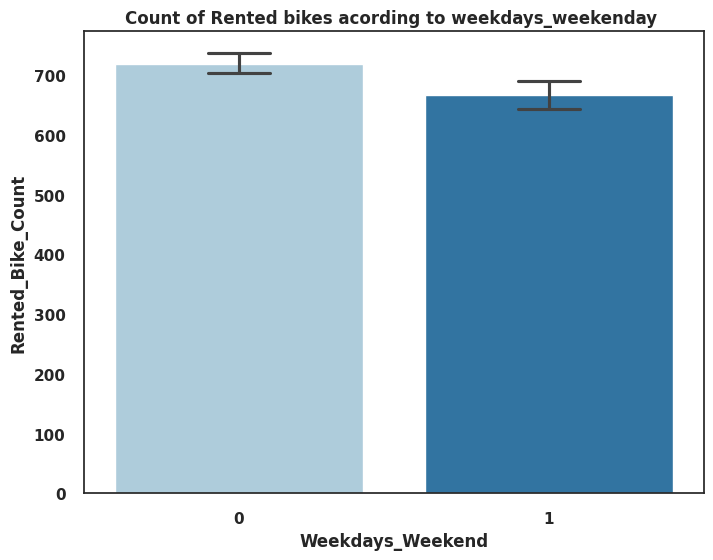

In [160]:
# Chart - 4 visualization code
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data= df,x='Weekdays_Weekend',y='Rented_Bike_Count',palette="Paired",ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

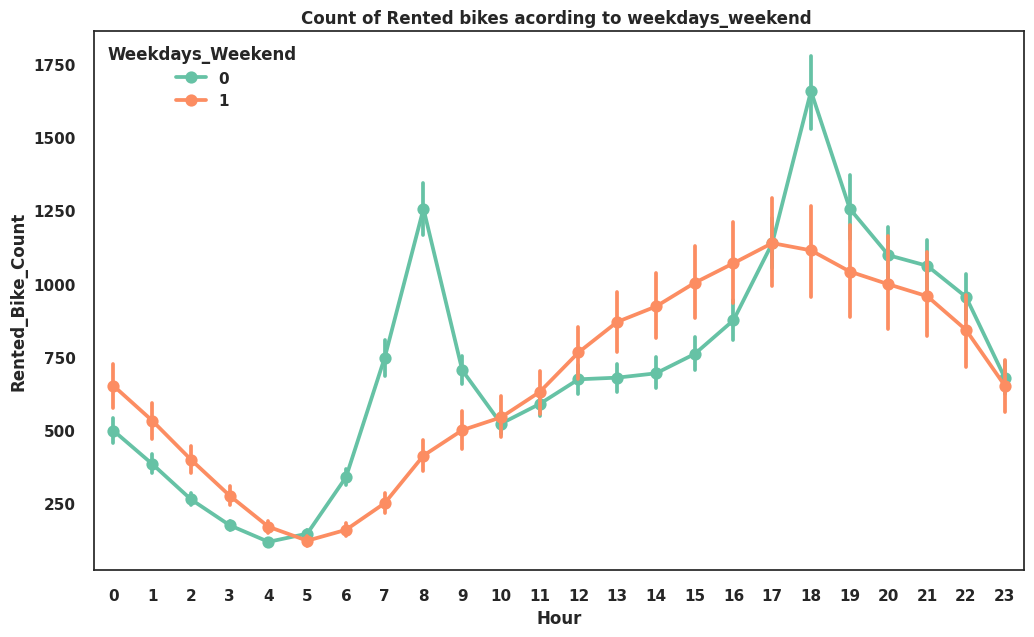

In [161]:
#anlysis of data by vizualisation (Multivariate)
fig,ax=plt.subplots(figsize=(12,7))
sns.set_palette("Set2")
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Weekdays_Weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

##### What is/are the insight(s) found from the chart?

* ***From the above point plot and bar plot we can say that, in the week days which represent in blue colur show that the demand of the bike higher because of the office.***
***Peak Time are 7 am to 9 am and 5 pm to 7 pm***
***The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.***   

#### **Chart - 5 ---> Change of Rented Bike counts in Different Hours of a Day**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

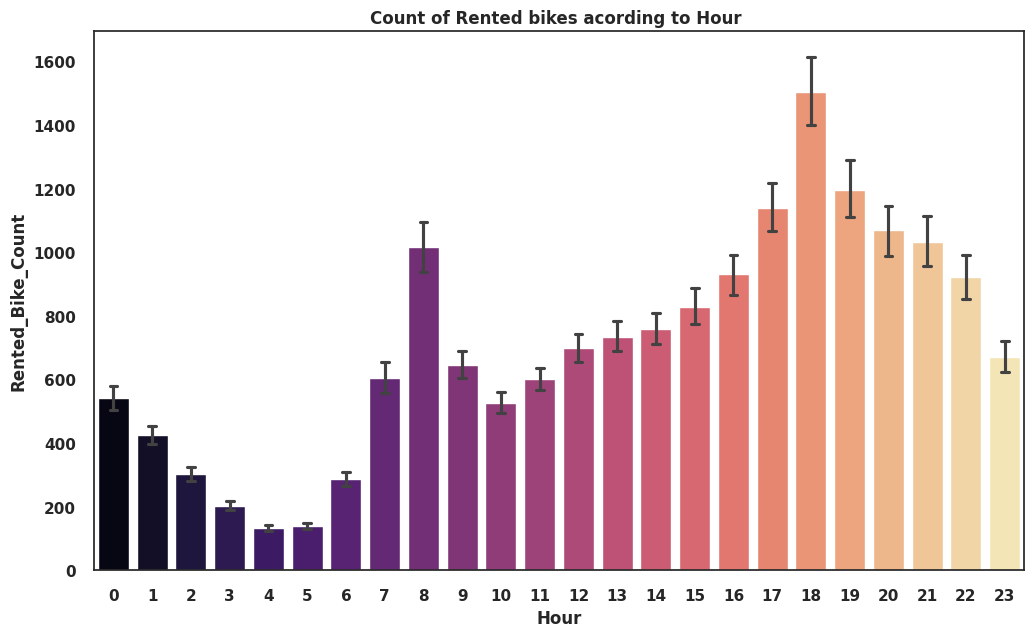

In [162]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=df,x='Hour',y='Rented_Bike_Count',palette = "magma",ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

##### What is/are the insight(s) found from the chart?

* ***In the above plot which shows, the use of rented bike according the hours and the data are from all over the year.***

* ***generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.***   

#### **Chart - 6 ---> Which season is the most busiest in terms of Rented Bike Usage?**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

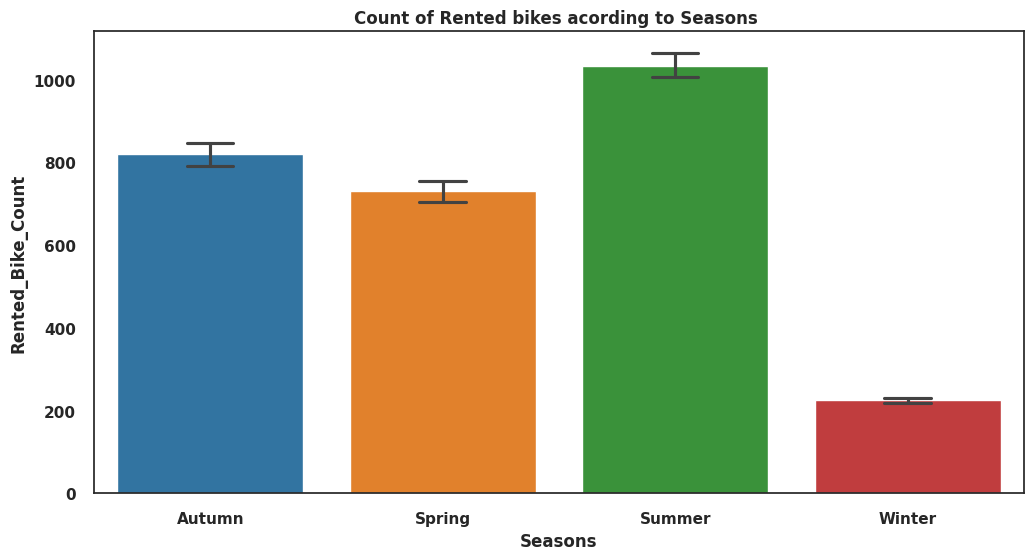

In [163]:
# Chart - 6 visualization code
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count', palette = 'tab10',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

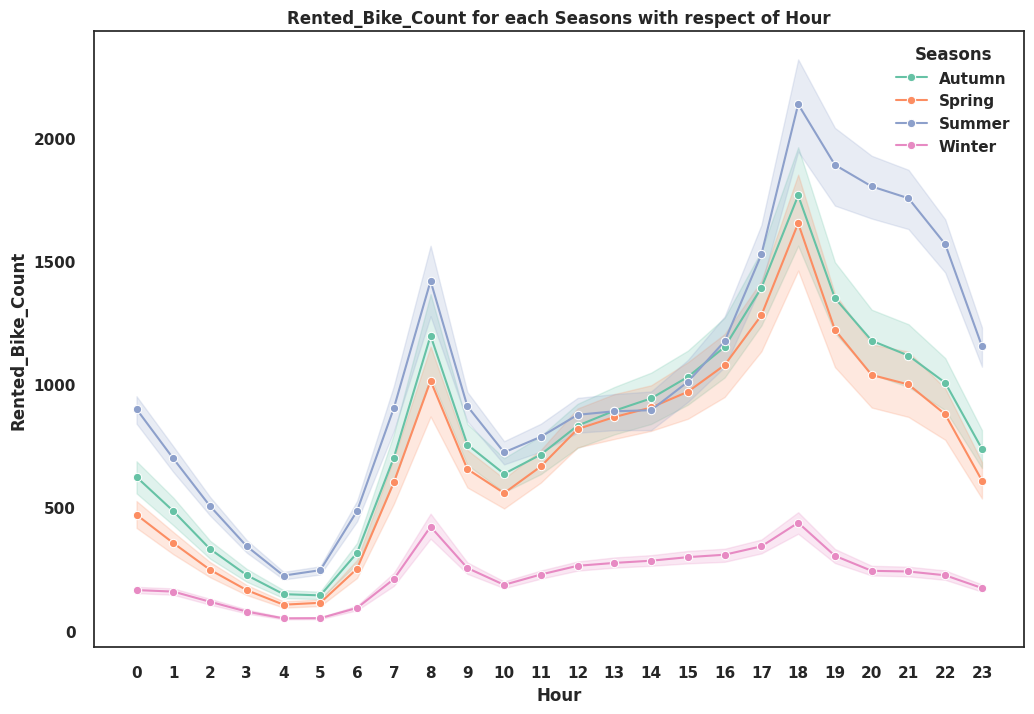

In [164]:
#analysing hour with bike demand with respect to different third value (Multivariate)


plt.figure(figsize=(12,8))
fig = sns.lineplot(x=df["Hour"],y=df['Rented_Bike_Count'],hue=df['Seasons'], marker ='o');
plt.xticks(range(24));
plt.title(f"Rented_Bike_Count for each Seasons with respect of Hour");
plt.show();

##### What is/are the insight(s) found from the chart?

* ***In the above bar plot and point plot which shows, the use of rented bike in four different seasons, and it clearly shows that,***
* ***In summer season the use of rented bike is high and peak time is 7am-9am and 5pm-7pm.***
* ***In winter season the use of rented bike is very low maybe because of snowfall, fog, cold etc.***

#### Chart - 7

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

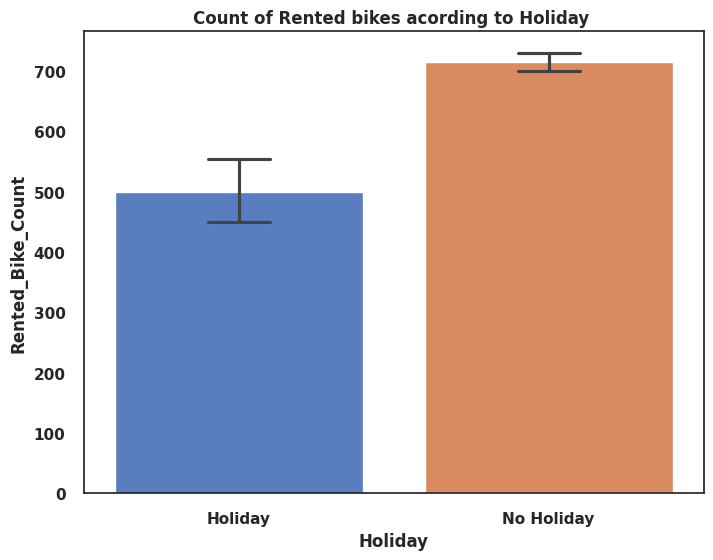

In [165]:
# Chart - 7 visualization code
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data= df,x='Holiday',y='Rented_Bike_Count',palette = "muted",ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

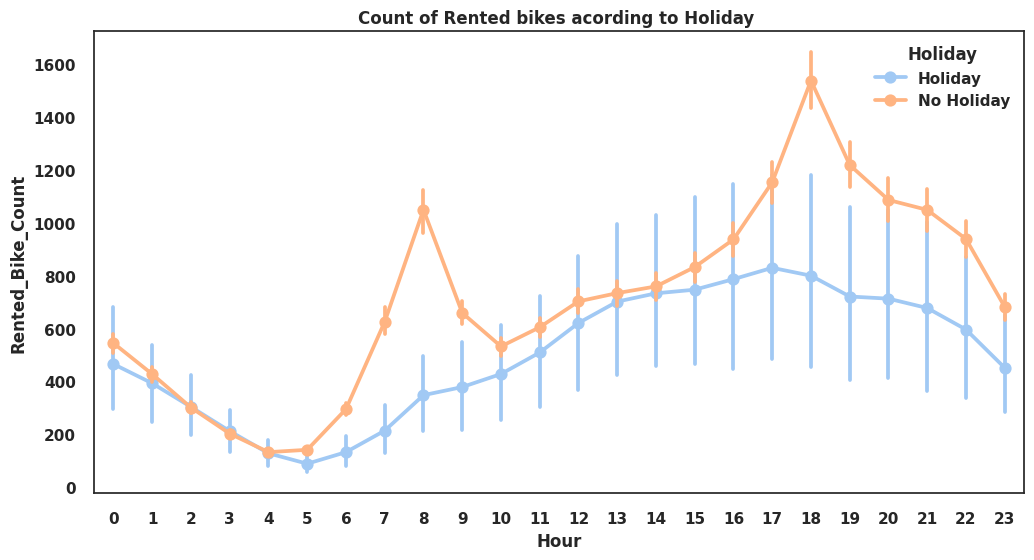

In [166]:
#anlysis of data by vizualisation (Multivariate)
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data= df,x='Hour',y='Rented_Bike_Count',hue='Holiday',palette = "pastel",ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

##### What is/are the insight(s) found from the chart?

* ***In the above bar plot and point plot which shows the use of rented bike in a holiday, and it clearly shows that,***
* ***In holiday, people uses the rented bike from 2pm-8pm***

##<b> Lets try to find how is the relation of numerical features with our dependent variable

#### Chart - 8 ---> Rented_Bike_Count" vs "Temperature

<Axes: xlabel='Temperature'>

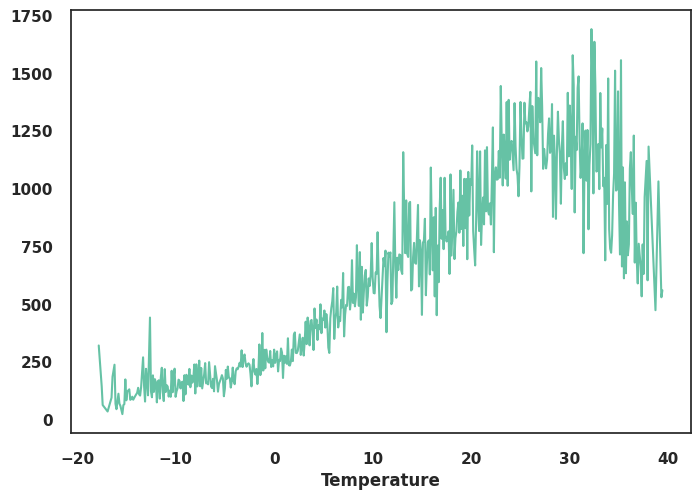

In [167]:
# Chart - 8 visualization code
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"
df[['Temperature','Rented_Bike_Count']].groupby('Temperature').mean()['Rented_Bike_Count'].plot()

#####  What is/are the insight(s) found from the chart?

* ***From the above plot we see that, people like to ride bikes when it is pretty hot around 25°C in average***

#### Chart - 9 ---> Rented_Bike_Count" vs "Dew_point_temperature

<Axes: xlabel='Dew_point_temperature'>

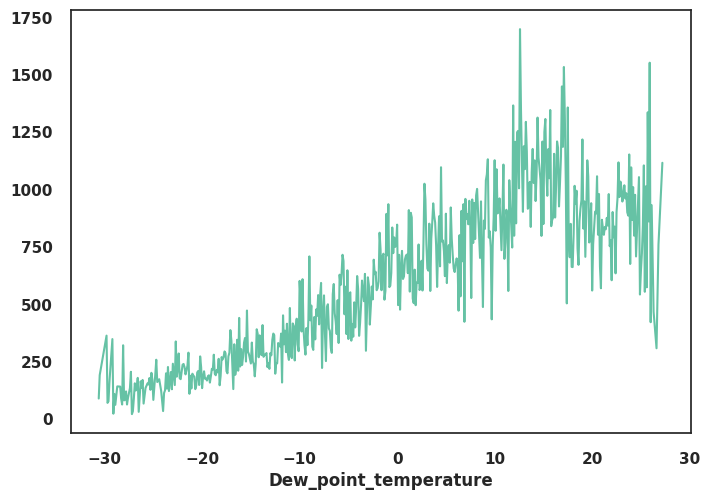

In [168]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature"
df[['Dew_point_temperature','Rented_Bike_Count']].groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

#####  What is/are the insight(s) found from the chart?

* ***From the above plot of "Dew_point_temperature', is almost same as the 'temperature' there is some similarity present we can check it in our next step.***

#### Chart - 10 -->  Rented_Bike_Count vs Dew_point_temperature

<Axes: xlabel='Solar_Radiation'>

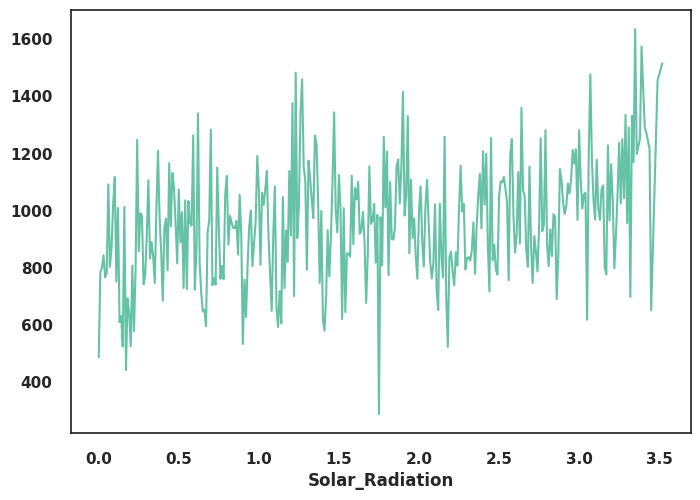

In [169]:
# Chart - 10 visualization code
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation"
df[['Solar_Radiation','Rented_Bike_Count']].groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()


#####  What is/are the insight(s) found from the chart?

* ***From the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the count of rents is around 1000***

#### Chart - 11 ---> Rented_Bike_Count vs Snowfall

<Axes: xlabel='Snowfall'>

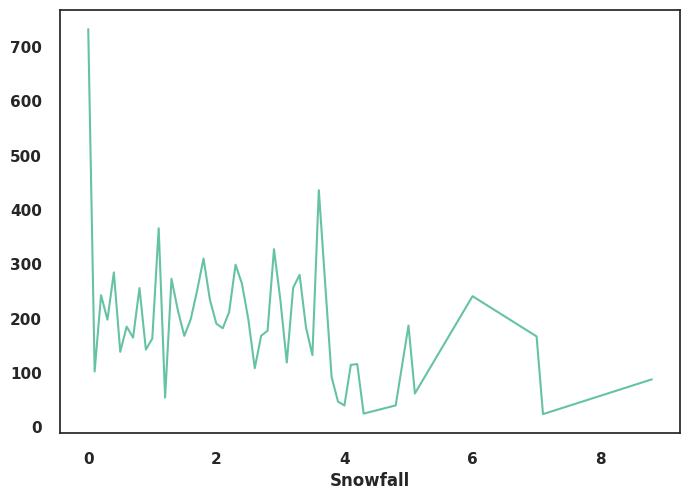

In [170]:
# Chart - 11 visualization code
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall"
df[['Snowfall','Rented_Bike_Count']].groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

#####  What is/are the insight(s) found from the chart?

* ***We can see from the plot that, on the y-axis, the amount of rented bike is very low. When we have more than 4 cm of snow, the bike rents is much lower***

#### Chart - 12 ---> Rented_Bike_Count and Rainfall

<Axes: xlabel='Rainfall'>

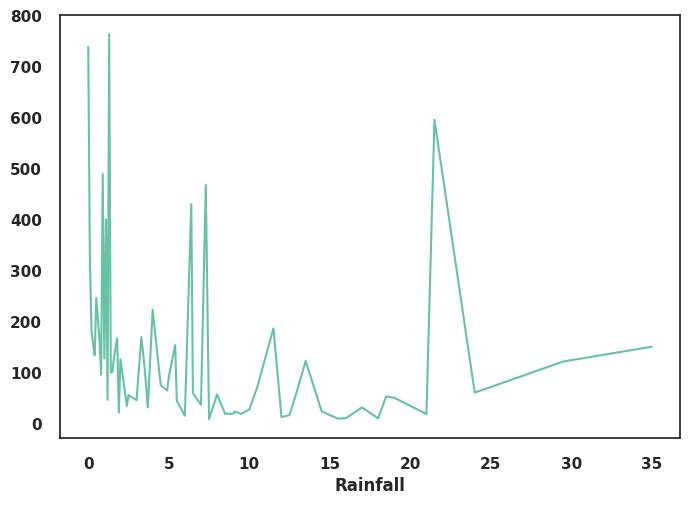

In [171]:
# Chart - 12 visualization code
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall"
df[['Rainfall','Rented_Bike_Count']].groupby('Rainfall').mean()['Rented_Bike_Count'].plot()


#####  What is/are the insight(s) found from the chart?

* ***We can see from the above plot that, even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes***

#### Chart - 13 ---> Rented_Bike_Count vs Wind_speed

<Axes: xlabel='Wind_speed'>

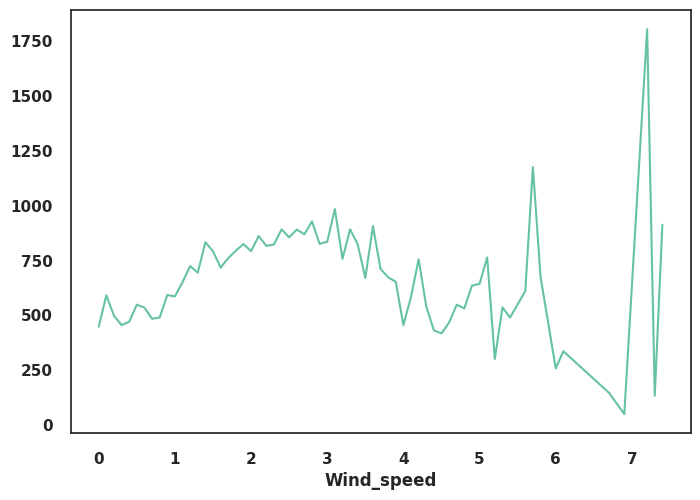

In [172]:
# Chart - 13 visualization code
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed"
df[['Wind_speed','Rented_Bike_Count']].groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

#####  What is/are the insight(s) found from the chart?

* ***We can see from the above plot that, the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind is 7 m/s then the demand of bike also increase that clearly means people love to ride bikes when its little windy.***

#### Chart - 14 ---> **REGRESSION PLOT**

* ***The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.***

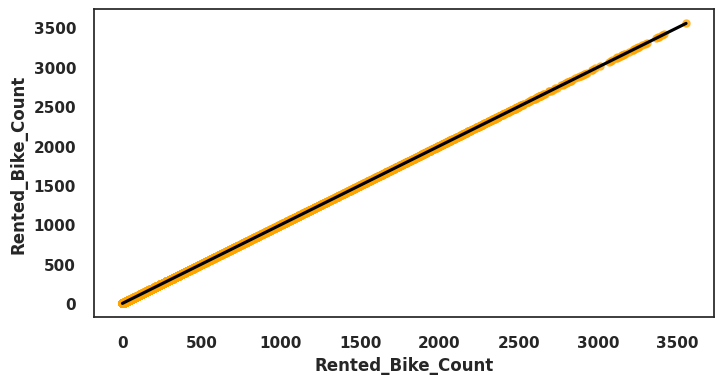

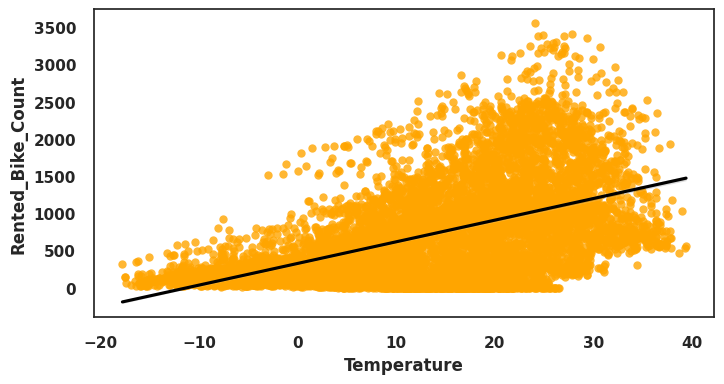

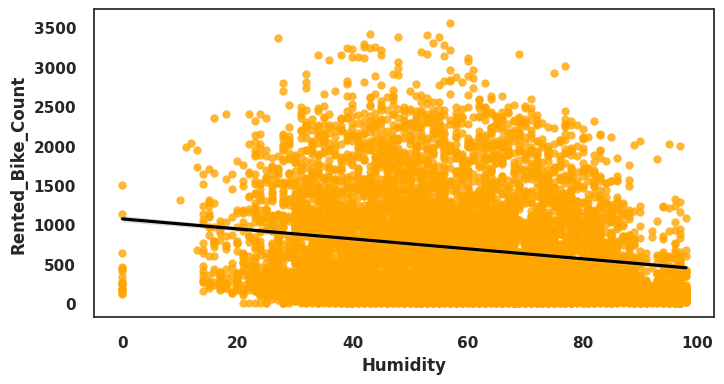

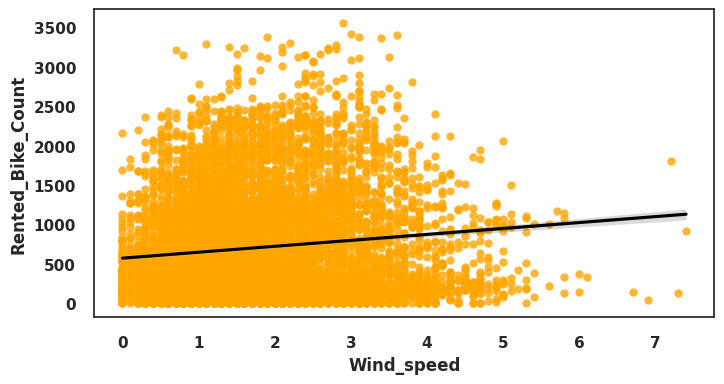

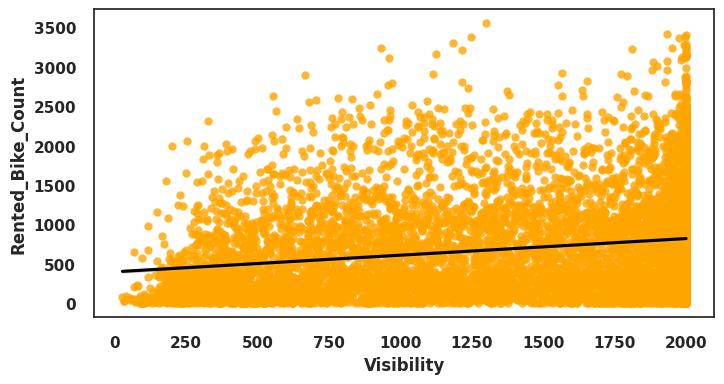

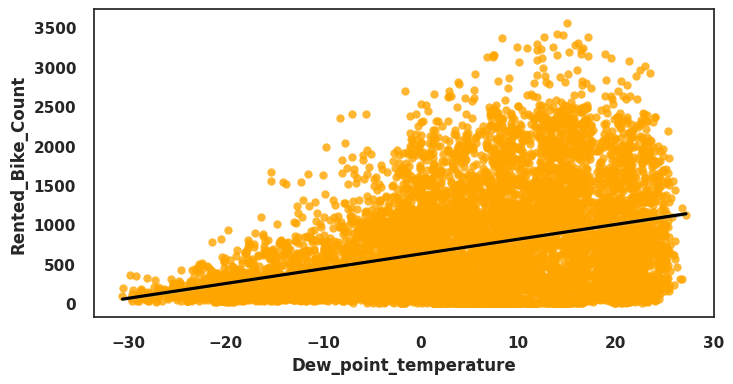

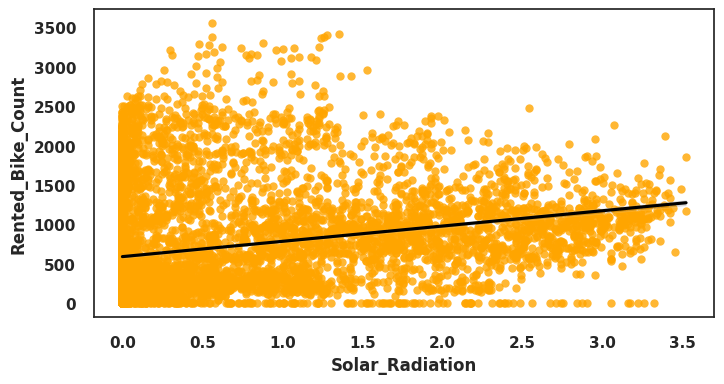

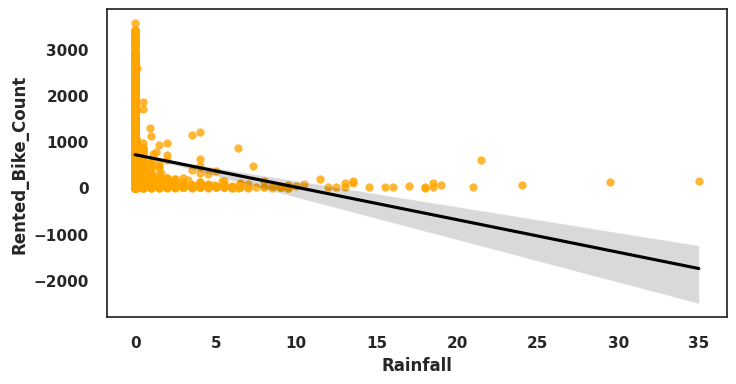

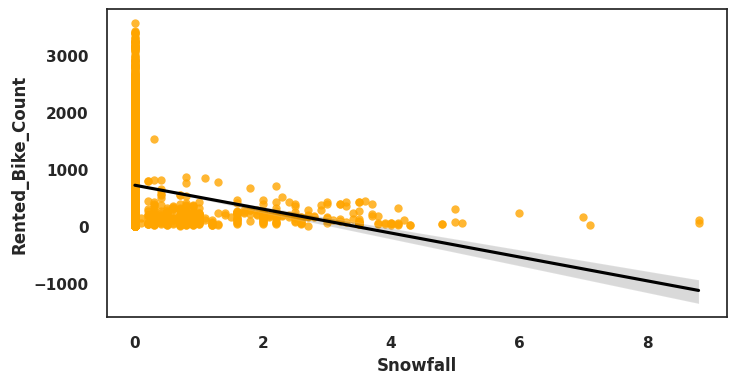

In [173]:
#printing the regression plot for all the numerical features
for col in num_feature:
  fig,ax=plt.subplots(figsize=(8,4))
  sns.regplot(x= df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

* ***From the above regression plot of all numerical features we see that the columns  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.***


* ***which means the rented bike count increases with increase of these features.***
* ***'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.***

#### Chart 15 -  **Box plot for Categorial Feature with respect to Bike Demand**


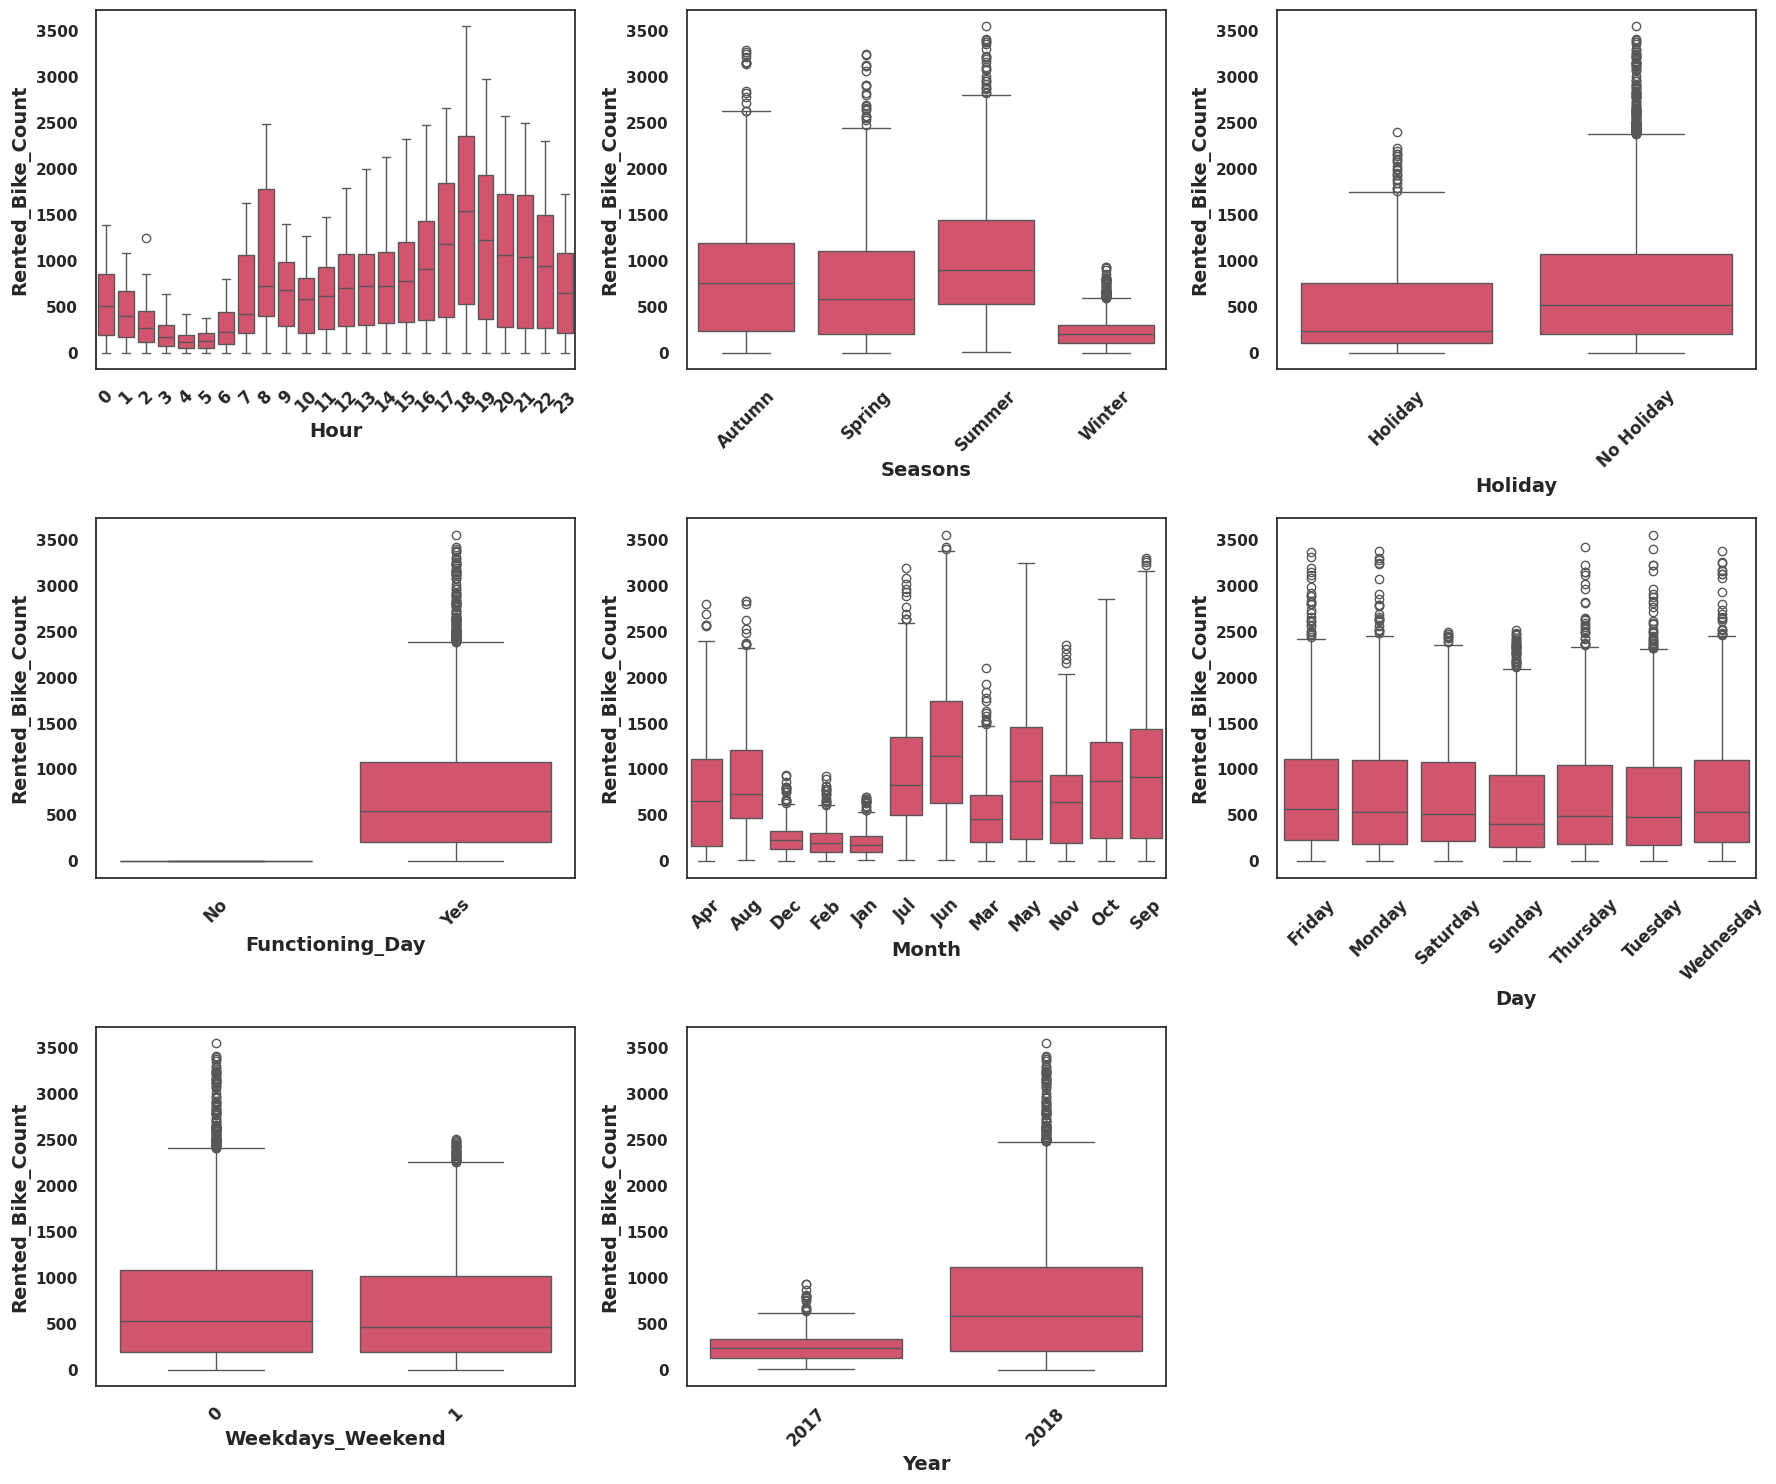

In [174]:
box_plot(df,cat_feature)

##### 1. Why did you pick the specific chart?

Box plots are helpful in learning about outliers and to determine where the majority of the points land at a glance.

##### 2. What is/are the insight(s) found from the chart?

Few rented bike count are above the maximum point.

Box plot can not show impact on business, used only to learn about distribution.

###Multivariate

#### Chart - 14 - Correlation Heatmap

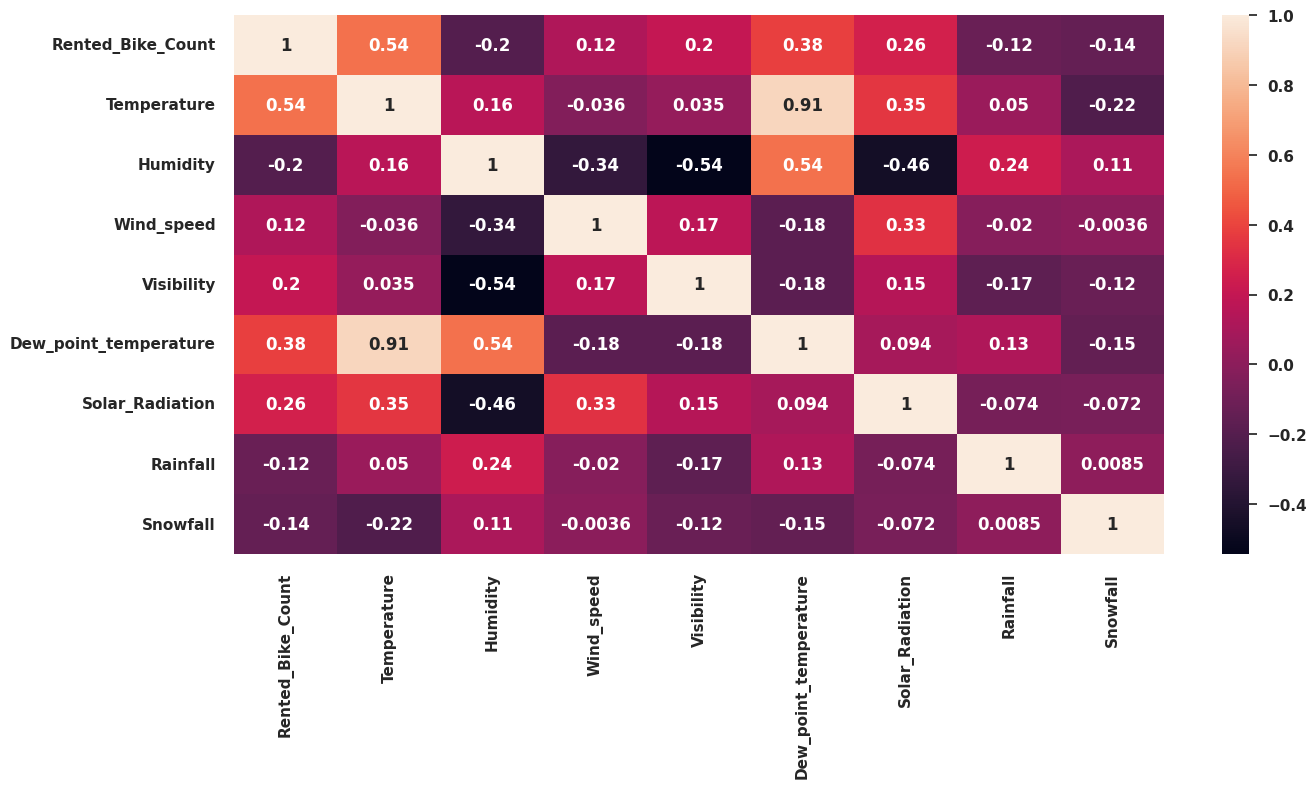

In [175]:
# Correlation Heatmap visualization code
#checking correlation using heatmap

# Drop non-numeric columns before plotting the heatmap
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap of correlations
plt.figure(figsize=(15,7))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

* Features like **Temperature(°C)** and **Dew point temperature(°C)** show **correlation** of **0.91** and in general, an **absolute correlation coefficient of > 0.7** among two or more predictors indicates the presence of **multicollinearity**.

> ⚡Note: If two variable or features show relationship either in same or opposite direction, then these variables thus show correlation between them.

* **Hour** and **temperature** show positive correlation.

#### Chart - 15 - Pair Plot

<Figure size 1200x800 with 0 Axes>

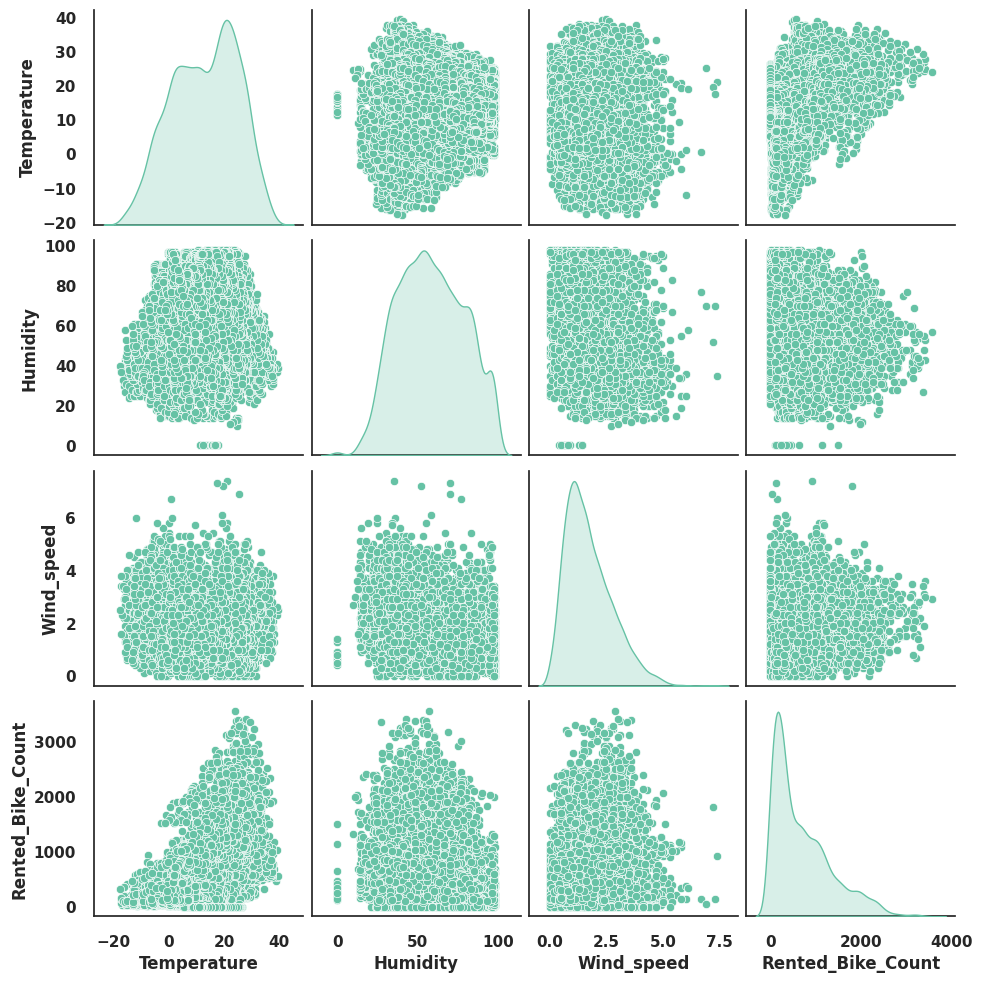

In [176]:
# Pair Plot visualization code
selected_vars = ['Temperature', 'Humidity', 'Wind_speed', 'Rented_Bike_Count']

plt.figure(figsize=(12, 8))
sns.pairplot(df[selected_vars], kind='scatter', diag_kind='kde',palette='tab10')
plt.show()

### **Let's check distribution of target variable- "Bike Rented Count":**

<Axes: xlabel='Rented_Bike_Count'>

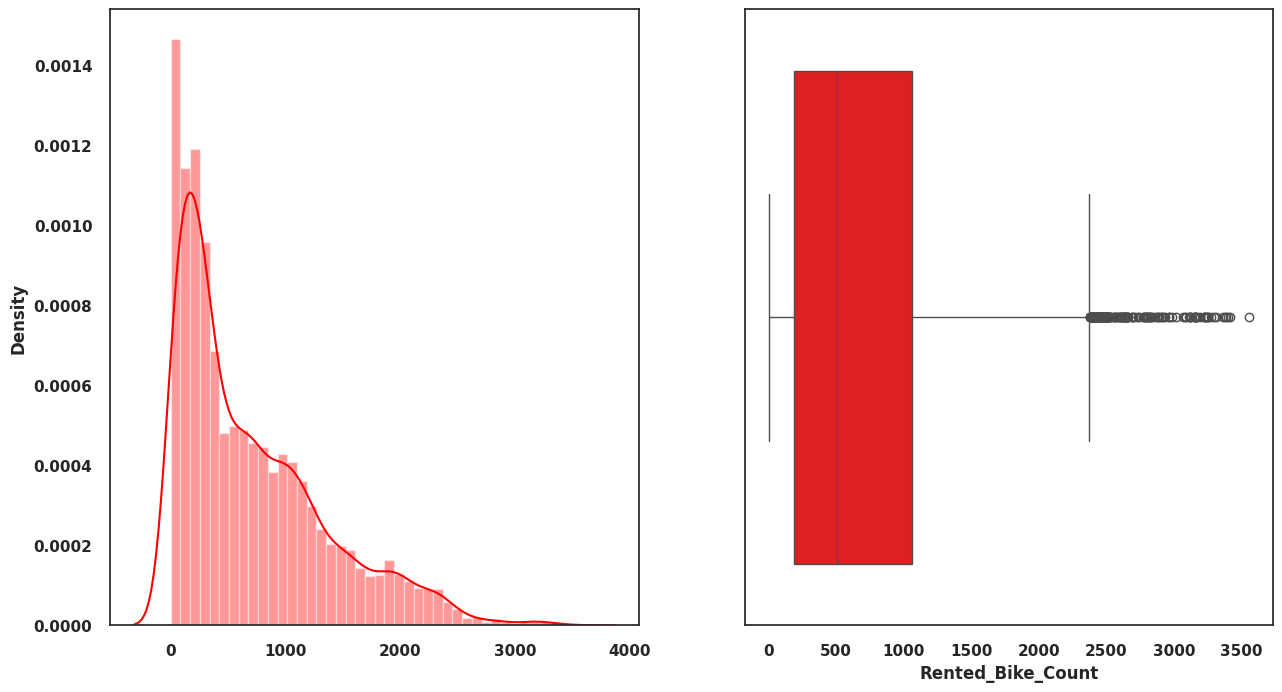

In [177]:
# plotting subplots
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=df['Rented_Bike_Count'],color='red',ax=axes[0])
# plt.figure(figsize=(15,8))
sns.boxplot(x=df['Rented_Bike_Count'],color='red',ax=axes[1])

* ***The above graph shows that, Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.***

####**Normalise Rented_Bike_Count column data**

* ***The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data***

<Axes: xlabel='Rented_Bike_Count'>

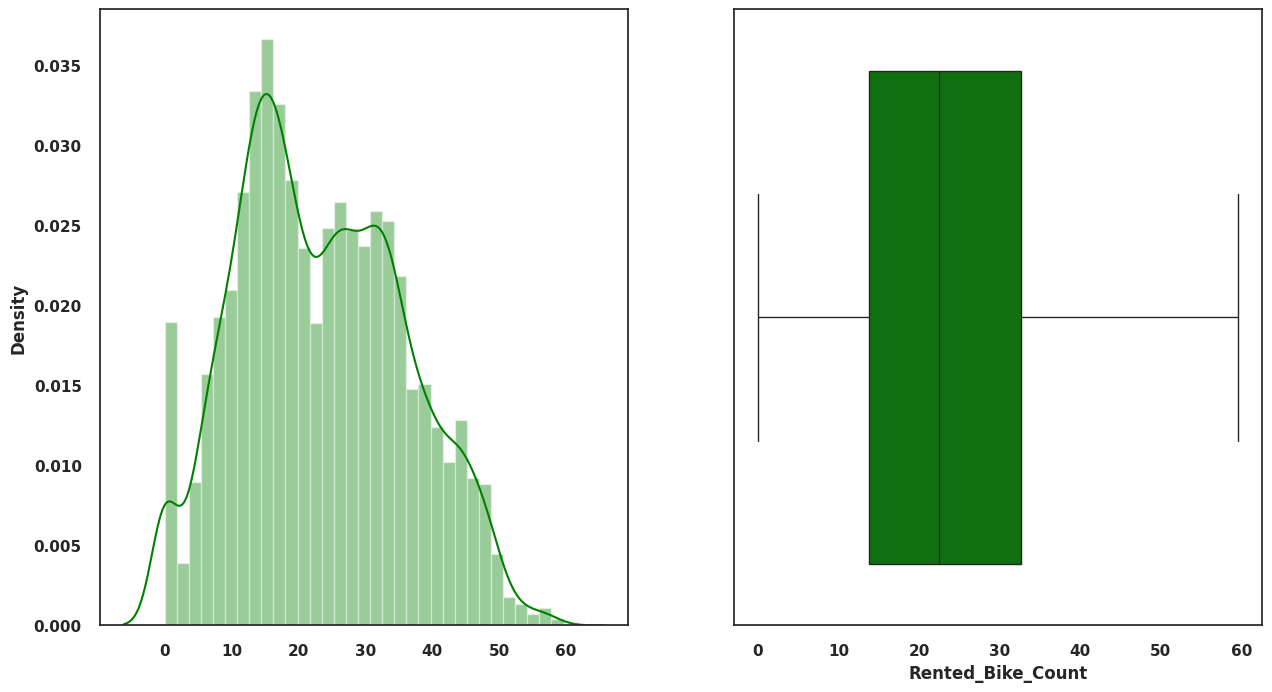

In [178]:
# Normalizing  our target variable by squre root method

f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=np.sqrt(df['Rented_Bike_Count']),color='g',ax=axes[0])
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']),color='g',ax=axes[1])

**Thus we normalized our dependent variable by square root method and also in boxplot we can see there are no outliers present.**

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null hypothesis (H0): The average number of rented bikes on weekdays is equal to the average number on weekends.**

* **Alternative hypothesis (H1): The average number of rented bikes on weekdays is significantly different from the average number on weekends.**

* **Test type : ANOVA test**

#### 2. Perform an appropriate statistical test.

In [179]:
# Perform Statistical Test to obtain P-Value
# Hypothesis Testing

null_hypothesis_H0 = "The average number of rented bikes on weekdays is equal to the average number on weekends."
alternative_hypothesis_H1 = "The average number of rented bikes on weekdays is significantly different from the average number on weekends."

weekday_counts = df[df['Weekdays_Weekend'] == 0]['Rented_Bike_Count']
weekend_counts = df[df['Weekdays_Weekend'] == 1]['Rented_Bike_Count']

# t-test
t_stat, p_value = stats.ttest_ind(weekday_counts, weekend_counts)

# Print the result of the test
print(f"F-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}")
if p_value < 0.05: #0.05 is significance threshold value to test
   print(f"{alternative_hypothesis_H1} (reject H0(Null Hypothesis))")
else:
   print(f"{null_hypothesis_H0} (fail to reject H0(Null Hypothesis))")


F-statistic: 3.415
p-value: 0.001
The average number of rented bikes on weekdays is significantly different from the average number on weekends. (reject H0(Null Hypothesis))


##### Which statistical test have you done to obtain P-Value?

t-test is statistical hypothesis test used to compare the means of two population groups. ANOVA is an observable technique used to compare the means of more than two population groups

##### Why did you choose the specific statistical test?

We chose the t-test because we are comparing the means of two independent groups (weekday and weekend counts) to determine if there's a significant difference in the average number of rented bikes.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null hypothesis: There is no relationship between temperature and the number of rented bikes.**
* **Alternative hypothesis: There is a relationship between temperature and the number of rented bikes.**
* **Test Type: Pearson correlation coefficient**

#### 2. Perform an appropriate statistical test.

In [180]:
# Perform Statistical Test to obtain P-Value
# Define the null and alternative hypotheses
null_hypothesis = "There is no relationship between temperature and the number of rented bikes."
alternative_hypothesis = "There is a relationship between temperature and the number of rented bikes."

# Calculate the correlation between temperature and the number of rented bikes
r, p = stats.pearsonr(df['Temperature'], df['Rented_Bike_Count'])

# Print the result of the test
print(f"Correlation coefficient: {r:.3f}")
print(f"p-value: {p:.3f}")
if p < 0.05:
   print(f"{alternative_hypothesis} (reject H0)")
else:
   print(f"{null_hypothesis} (fail to reject H0)")

Correlation coefficient: 0.539
p-value: 0.000
There is a relationship between temperature and the number of rented bikes. (reject H0)


##### Which statistical test have you done to obtain P-Value?

I used the Pearson correlation coefficient and the p-value to test the statistical significance of the relationship between the number of rented bikes and the temperature. Specifically, I used the pearsonr() function from the scipy.stats library to calculate the Pearson correlation coefficient and the p-value between the Temperature and Rented_Bike_Count columns of the data.

##### Why did you choose the specific statistical test?

The Pearson correlation coefficient is a measure of the strength and direction of the linear relationship between two variables, and it takes on values between -1 and 1. A value of -1 indicates a strong negative linear relationship, a value of 0 indicates no linear relationship, and a value of 1 indicates a strong positive linear relationship.

I chose to use the Pearson correlation coefficient and p-value for this null hypothesis because they are suitable for testing the statistical significance of a linear relationship between two continuous variables. In this case, the Temperature column is a continuous variable that can take on any value within a certain range, and the Rented_Bike_Count column is also a continuous variable that can take on any integer value within a certain range.






### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null hypothesis: There is no difference in the mean number of rented bikes between different seasons.**
* **Alternative hypothesis: There is a difference in the mean number of rented bikes between different seasons.**
* **Test Type: ANOVA Test**

#### 2. Perform an appropriate statistical test.

In [181]:
# Perform Statistical Test to obtain P-Value
# Define the null and alternative hypotheses
null_hypothesis = "There is no difference in the mean number of rented bikes between different seasons."
alternative_hypothesis = "There is a difference in the mean number of rented bikes between different seasons."

# Group the data by season
data_by_season = df.groupby('Seasons')

# Calculate the mean number of rented bikes for each season
means = data_by_season['Rented_Bike_Count'].mean()

# Perform an ANOVA test to compare the means
F, p = stats.f_oneway(*[data_by_season['Rented_Bike_Count'].get_group(season)
                         for season in data_by_season.groups])
# Print the result of the test
print(f"F-statistic: {F:.3f}")
print(f"p-value: {p:.3f}")
if p < 0.05:
   print(f"{alternative_hypothesis} (reject H0)")
else:
   print(f"{null_hypothesis} (fail to reject H0)")

F-statistic: 776.468
p-value: 0.000
There is a difference in the mean number of rented bikes between different seasons. (reject H0)


##### Which statistical test have you done to obtain P-Value?

I chose to use an analysis of variance (ANOVA) test for the hypotheses because ANOVA is a statistical test that is used to determine whether there is a statistically significant difference in the means of two or more groups.

##### Why did you choose the specific statistical test?

This test is suitable for these hypotheses because they both involve comparing the mean values of a variable (the number of rented bikes) with different group (seasons).

ANOVA works by comparing the variance within each group to the variance between the groups. If the variance within the groups is small relative to the variance between the groups, it suggests that the means of the groups are significantly different. On the other hand, if the variance within the groups is large relative to the variance between the groups, it suggests that the means of the groups are not significantly different.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Month                    0
Day                      0
Weekdays_Weekend         0
Year                     0
dtype: int64


<Axes: >

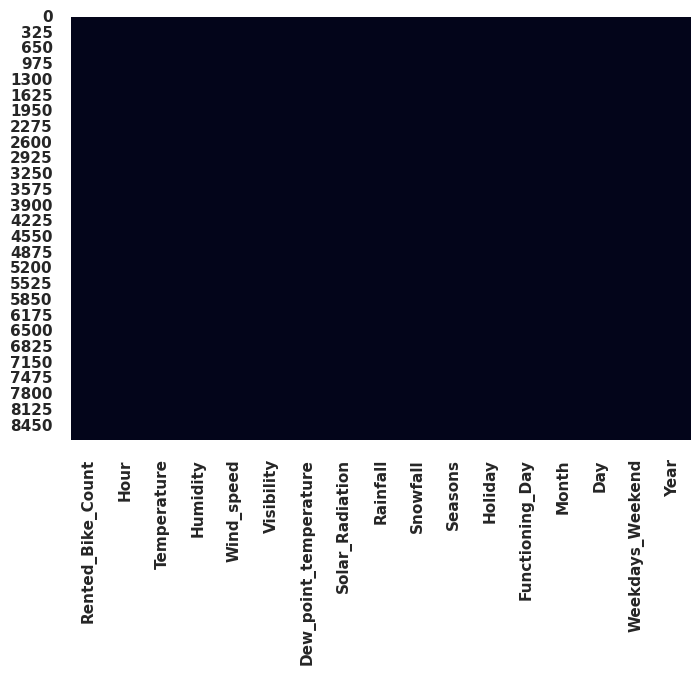

In [182]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Since, there were no missing values to handle in the given dataset no further manipulation was needed.

### 2. Handling Outliers

In [183]:
# Handling Outliers & Outlier treatments

symmetric_feature=[]
non_symmetric_feature=[]
for i in df.describe().columns:
  if abs(df[i].mean()-df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

#ignoring rainfall and snowfall due to sparsity(upto 75 percentile value was 0
# and this outliers are needed for model to learn)
#ignoring dependent variable as Outliers in the dependent variable may be
#indicative of unusual or unexpected patterns in the data that could be of interest and should not be removed

#note: model perform well on capping outliers in both features after trial

# symmetric_feature = symmetric_feature[:-2]
# non_symmetric_feature.pop(0)
# print("Symmetric Distributed Features : -",symmetric_feature)
# print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Rainfall', 'Snowfall']
Skew Symmetric Distributed Features : - ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation']


In [184]:
# For Symmetric features defining upper and lower boundry(normally distributed using std and mean)
def outlier_treatment(df,feature):
  upper_boundary= df[feature].mean()+3*df[feature].std()
  lower_boundary= df[feature].mean()-3*df[feature].std()
  return upper_boundary,lower_boundary

In [185]:
# Restricting/ capping the data to lower and upper boundry

for feature in symmetric_feature:
  #below lower value then value = lower value
  df.loc[df[feature]<= outlier_treatment(df=df,feature=feature)[1], feature]=outlier_treatment(df=df,feature=feature)[1]
  #above higher value, then value = higher value
  df.loc[df[feature]>= outlier_treatment(df=df,feature=feature)[0], feature]=outlier_treatment(df=df,feature=feature)[0]

In [186]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+1.5*IQR
  # print(f'feature: {feature} IQR:{IQR} lower: {lower_bridge} upper:{upper_bridge}')
  return upper_bridge,lower_bridge

In [187]:
# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
  df.loc[df[feature]<= outlier_treatment_skew(df=df,feature=feature)[1], feature]=outlier_treatment_skew(df=df,feature=feature)[1]
  df.loc[df[feature]>= outlier_treatment_skew(df=df,feature=feature)[0], feature]=outlier_treatment_skew(df=df,feature=feature)[0]

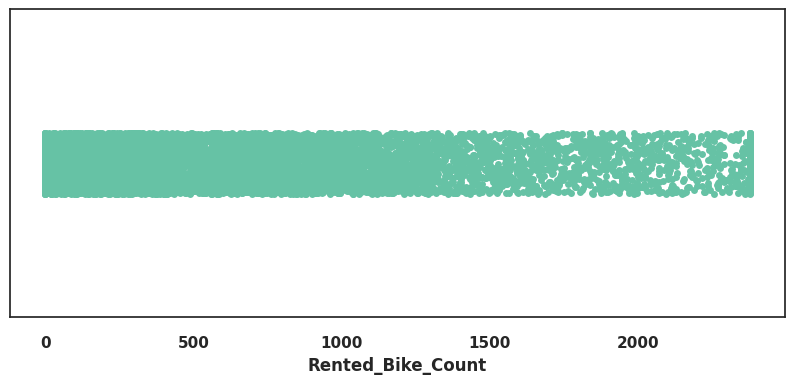

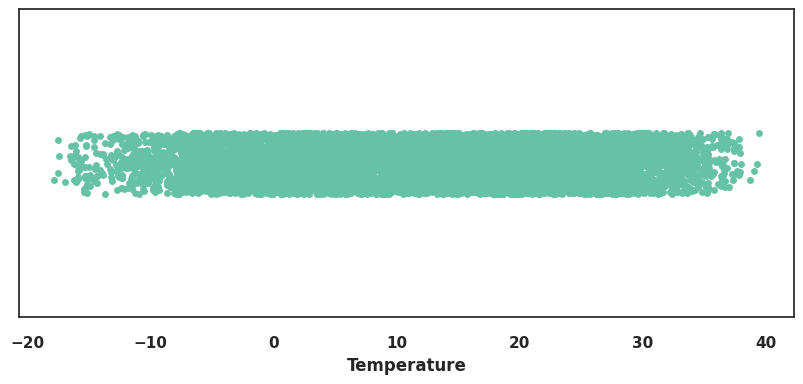

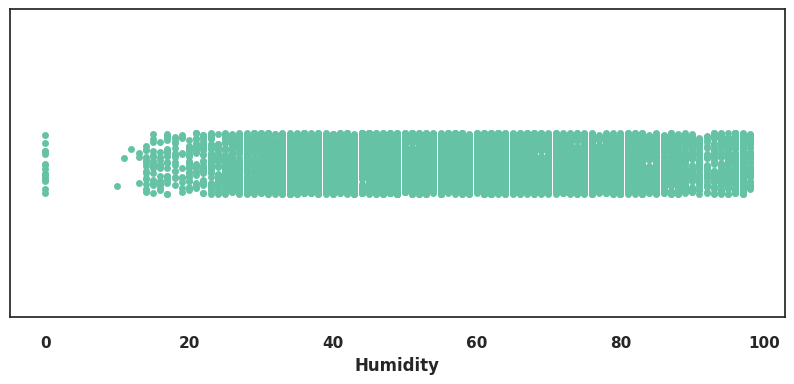

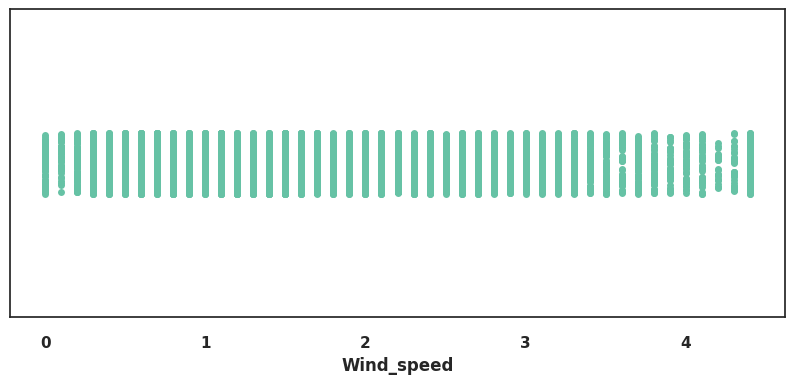

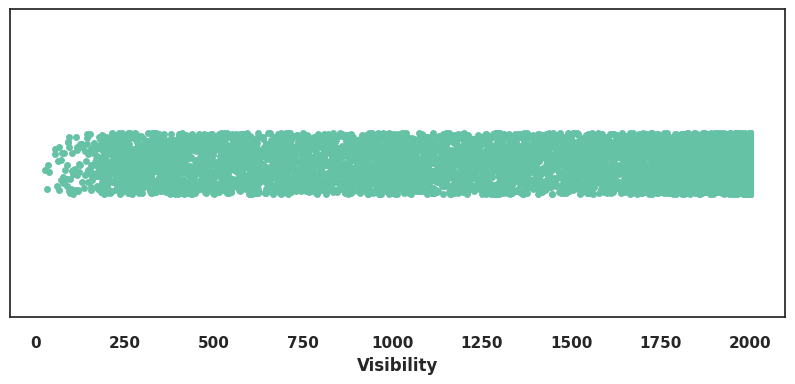

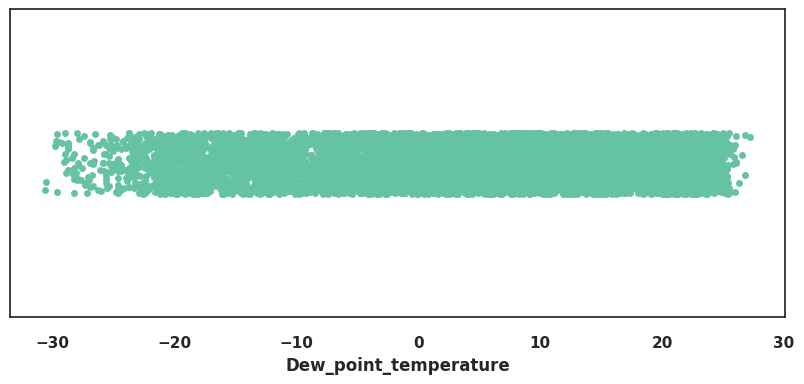

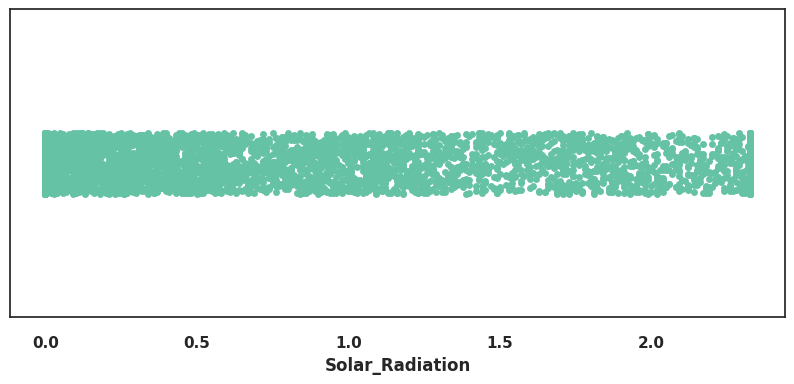

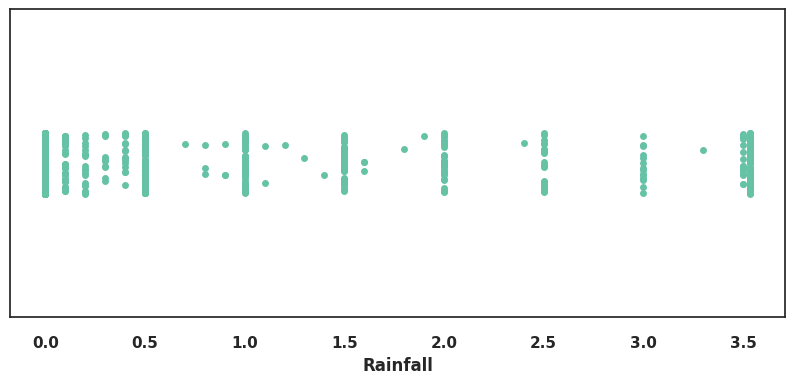

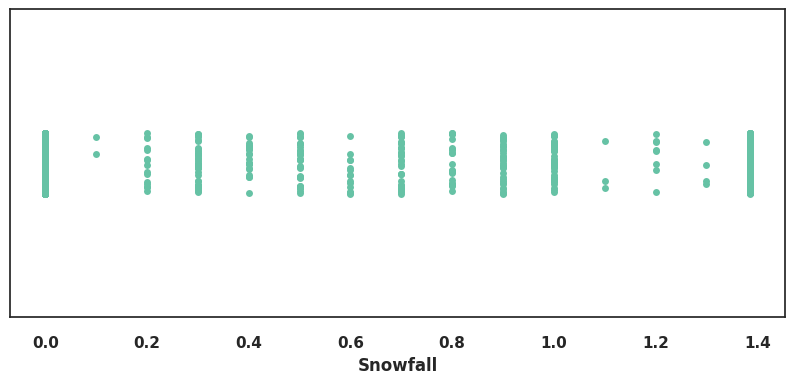

In [188]:
# After Outlier Treatment showing the dataset distribution using strip plot
# Visualising  code for the numerical columns
for col in df.describe().columns:
  fig=plt.figure(figsize=(10,4))
  sns.stripplot(df[col],orient='h')

##### What all outlier treatment techniques have you used and why did you use those techniques?

I separated the skew symmetric and symmetric features and define the upper and lower boundry as defined below. Then, I used capping method to change outliers into upper and lower limit instead of trimming where i could have just removed the entire data.

Another way to do it is dropping extreme values.

In a Gaussian distribution while it’s the symmetric curve and outlier are present. Then, we can set the boundary by taking standard deviation into action.

Identifying which columns in a dataset have a symmetric distribution can be useful because it can give you insight into the overall shape of the distribution of values in each column. For example, if a column has a symmetric distribution, it may be more likely to have a bell-shaped curve when plotted on a histogram. This can be useful to know because certain statistical techniques and machine learning algorithms assume that the data is normally distributed, and having a symmetric distribution is one indication that the data may be approximately normally distributed. On the other hand, if a column has a non-symmetric distribution, it may be more likely to be skewed in one direction or the other, which could affect the validity of certain statistical tests or the performance of certain machine learning models.

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 — Q1) is called the interquartile range or IQ. A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:

* lower inner fence: Q1–1.5*IQ
* upper inner fence: Q3 + 1.5*IQ
* lower outer fence: Q1–3*IQ
* upper outer fence: Q3 + 3*IQ

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [189]:
#deleting extra feature
df.drop(columns = ['Day','Year'], axis =1, inplace = True)
df

Rented_Bike_Count Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254.00    0        -5.20        37        2.20        2000   
1                204.00    1        -5.50        38        0.80        2000   
2                173.00    2        -6.00        39        1.00        2000   
3                107.00    3        -6.20        40        0.90        2000   
4                 78.00    4        -6.00        36        2.30        2000   
...                 ...  ...          ...       ...         ...         ...   
8755            1003.00   19         4.20        34        2.60        1894   
8756             764.00   20         3.40        37        2.30        2000   
8757             694.00   21         2.60        39        0.30        1968   
8758             712.00   22         2.10        41        1.00        1859   
8759             584.00   23         1.90        43        1.30        1909   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                    -17.60             0.00      0.00      0.00  Winter   
1                    -17.60             0.00      0.00      0.00  Winter   
2                    -17.70             0.00      0.00      0.00  Winter   
3                    -17.60             0.00      0.00      0.00  Winter   
4                    -18.60             0.00      0.00      0.00  Winter   
...                     ...              ...       ...       ...     ...   
8755                 -10.30             0.00      0.00      0.00  Autumn   
8756                  -9.90             0.00      0.00      0.00  Autumn   
8757                  -9.90             0.00      0.00      0.00  Autumn   
8758                  -9.80             0.00      0.00      0.00  Autumn   
8759                  -9.30             0.00      0.00      0.00  Autumn   

         Holiday Functioning_Day Month Weekdays_Weekend  
0     No Holiday             Yes   Dec                0  
1     No Holiday             Yes   Dec                0  
2     No Holiday             Yes   Dec                0  
3     No Holiday             Yes   Dec                0  
4     No Holiday             Yes   Dec                0  
...          ...             ...   ...              ...  
8755  No Holiday             Yes   Nov                0  
8756  No Holiday             Yes   Nov                0  
8757  No Holiday             Yes   Nov                0  
8758  No Holiday             Yes   Nov                0  
8759  No Holiday             Yes   Nov                0  

[8760 rows x 15 columns]

In [190]:
# Correlation Heatmap visualization code
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation for numeric columns
corr = numeric_df.corr()

cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

# Create a larger figure
plt.figure(figsize=(5, 15))

corr.style.background_gradient(cmap, axis=1)\
    .format(precision=2)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_table_styles(magnify())


<Figure size 500x1500 with 0 Axes>

In [191]:
# Since Temperature and Dew point temperature are corelated with each other. We will drop dew point temperature.
df.drop('Dew_point_temperature',inplace=True,axis=1)

#### 2. Feature Selection

**Multicolinearity**

**VIF**

---
* Calculating vif identify the strength of correlation between independent variable and the strength of that correlation.

* Vif starts at 1 and has no upper limit.

* 1-5 : Moderate, No corrective measure

* Greater than 5: Severe, Coefficient and p-value are questionable


In [192]:
#Creating the vif function

def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [193]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])

variables  VIF
0      Temperature 3.26
1         Humidity 5.05
2       Wind_speed 4.26
3       Visibility 4.56
4  Solar_Radiation 2.32
5         Rainfall 1.17
6         Snowfall 1.17

In [194]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Humidity']]])

variables  VIF
0      Temperature 2.36
1       Wind_speed 3.78
2       Visibility 3.84
3  Solar_Radiation 1.95
4         Rainfall 1.08
5         Snowfall 1.09

In [195]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Humidity','Visibility']]])

variables  VIF
0      Temperature 1.98
1       Wind_speed 2.10
2  Solar_Radiation 1.94
3         Rainfall 1.06
4         Snowfall 1.08

In [196]:
# As per above vif calculation dropping humidity and visibility columns.
df.drop(['Humidity','Visibility'],inplace=True,axis=1)

In [197]:
# Correlation Heatmap visualization code
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation for numeric columns
corr = numeric_df.corr()

cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

# Create a larger figure
plt.figure(figsize=(5, 15))

corr.style.background_gradient(cmap, axis=1)\
    .format(precision=2)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_table_styles(magnify())


<Figure size 500x1500 with 0 Axes>

##### What all feature selection methods have you used  and why?

1st of all, I have removed some feature that is not requied for out model.
Secondly, we have droppd the feature that is highly correlated with other feature after observing it from correlation heatmap.
Then finally we deal with multi-colinearity and validate it by VIF.

### 4. Categorical Encoding

**A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables by some of the well known techniques like One Hot Encoding, Label Encoder, Mapping.**

In [198]:
# checking categoiries in season column.
df['Seasons'].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [199]:
# Createing dummy variables
df=pd.get_dummies(df,columns=['Seasons'],prefix='Seasons',drop_first=True)


In [200]:
# checking categoiries in holiday columns.
df['Holiday'].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [201]:
# Labeling for holiday=1 and no holiday=0
df['Holiday']=df['Holiday'].map({'No Holiday':0, 'Holiday':1})

In [202]:
df['Month'] = df['Month'].map({'Jan' : 1, 'Feb' : 2, 'Mar' : 3, 'Apr' : 4, 'May' : 5, 'Jun' : 6, 'Jul' : 7, 'Aug' : 8, 'Sep' : 9, 'Oct' : 10, 'Nov' : 11, 'Dec' : 12 })

In [203]:
# # Labeling for Yes=1 and no No=0
df['Functioning_Day']=df['Functioning_Day'].map({'Yes':1, 'No':0})

In [204]:
# checking dummy and labled columns
df.head(3)

Rented_Bike_Count Hour  Temperature  Wind_speed  Solar_Radiation  Rainfall  \
0             254.00    0        -5.20        2.20             0.00      0.00   
1             204.00    1        -5.50        0.80             0.00      0.00   
2             173.00    2        -6.00        1.00             0.00      0.00   

   Snowfall Holiday Functioning_Day Month Weekdays_Weekend  Seasons_Spring  \
0      0.00       0               1    12                0           False   
1      0.00       0               1    12                0           False   
2      0.00       0               1    12                0           False   

   Seasons_Summer  Seasons_Winter  
0           False            True  
1           False            True  
2           False            True

In [205]:
df = df.astype(int)

In [206]:
df.head(3)

Rented_Bike_Count  Hour  Temperature  Wind_speed  Solar_Radiation  \
0                254     0           -5           2                0   
1                204     1           -5           0                0   
2                173     2           -6           1                0   

   Rainfall  Snowfall  Holiday  Functioning_Day  Month  Weekdays_Weekend  \
0         0         0        0                1     12                 0   
1         0         0        0                1     12                 0   
2         0         0        0                1     12                 0   

   Seasons_Spring  Seasons_Summer  Seasons_Winter  
0               0               0               1  
1               0               0               1  
2               0               0               1

In [207]:
# final info before going for modeling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Rented_Bike_Count  8760 non-null   int64
 1   Hour               8760 non-null   int64
 2   Temperature        8760 non-null   int64
 3   Wind_speed         8760 non-null   int64
 4   Solar_Radiation    8760 non-null   int64
 5   Rainfall           8760 non-null   int64
 6   Snowfall           8760 non-null   int64
 7   Holiday            8760 non-null   int64
 8   Functioning_Day    8760 non-null   int64
 9   Month              8760 non-null   int64
 10  Weekdays_Weekend   8760 non-null   int64
 11  Seasons_Spring     8760 non-null   int64
 12  Seasons_Summer     8760 non-null   int64
 13  Seasons_Winter     8760 non-null   int64
dtypes: int64(14)
memory usage: 958.2 KB


#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used One Hot Encoding in 'Season' feature and used mapping technique for other categorical features to convert category to number.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [208]:
# Transform Your data
# Getting symmetric and skew symmetric features from the columns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df.describe().columns:
  if abs(df[i].mean()-df[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Hour', 'Rainfall', 'Snowfall', 'Holiday', 'Functioning_Day']
Skew Symmetric Distributed Features : - ['Rented_Bike_Count', 'Temperature', 'Wind_speed', 'Solar_Radiation', 'Month', 'Weekdays_Weekend', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter']


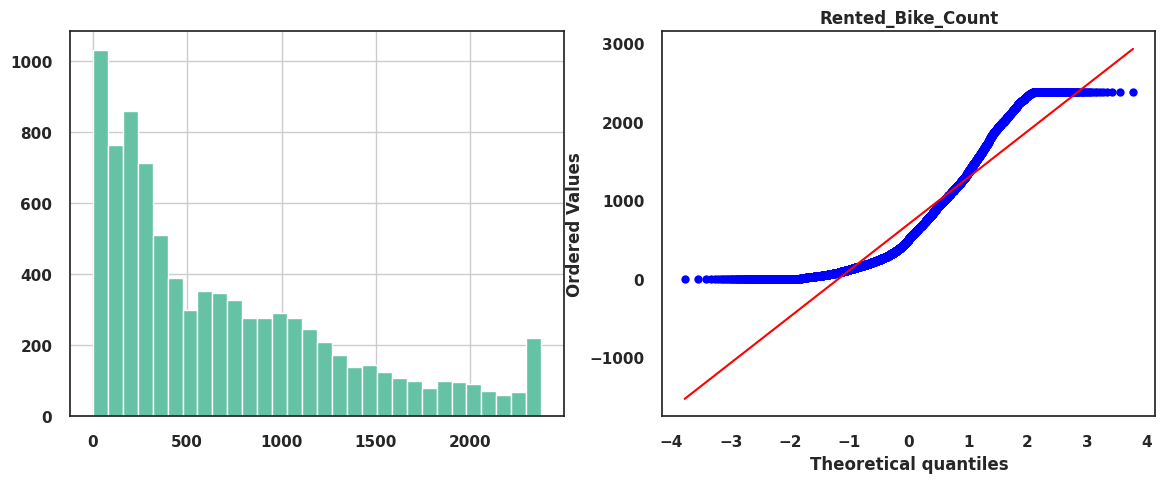

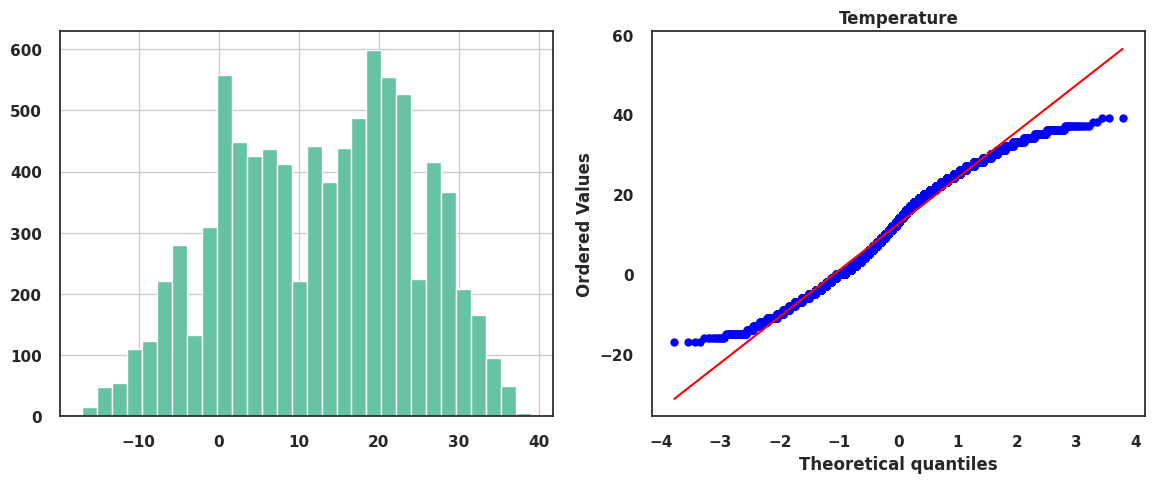

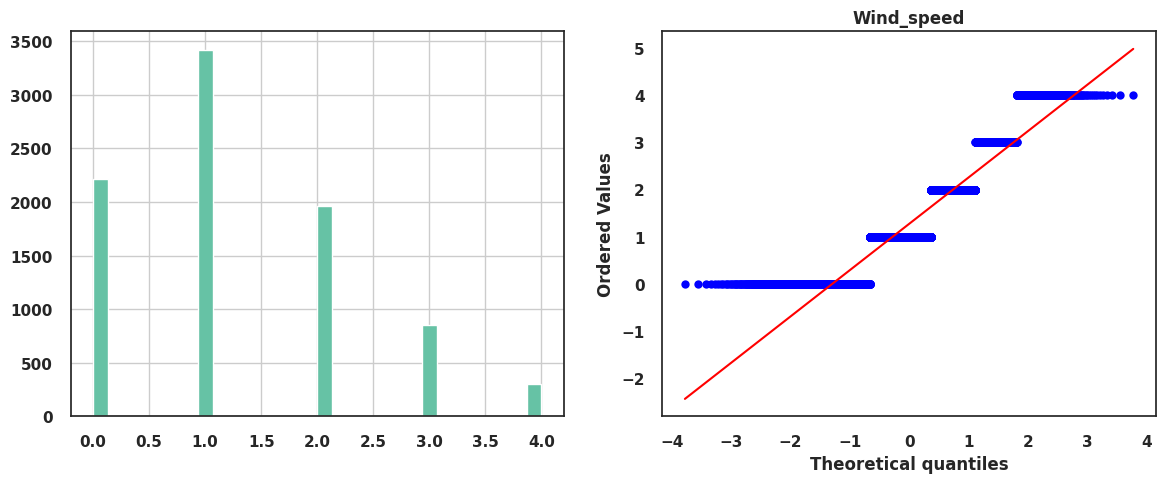

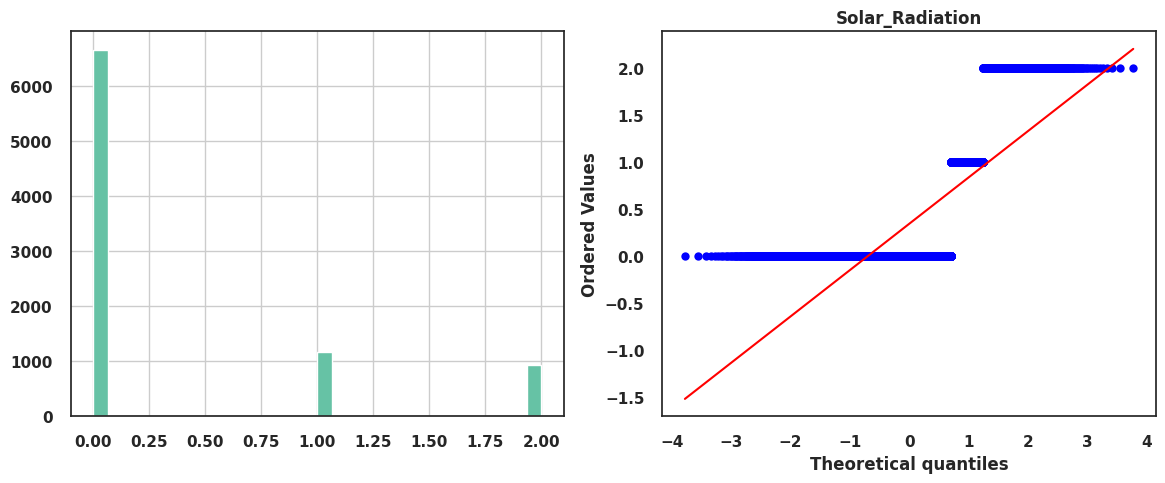

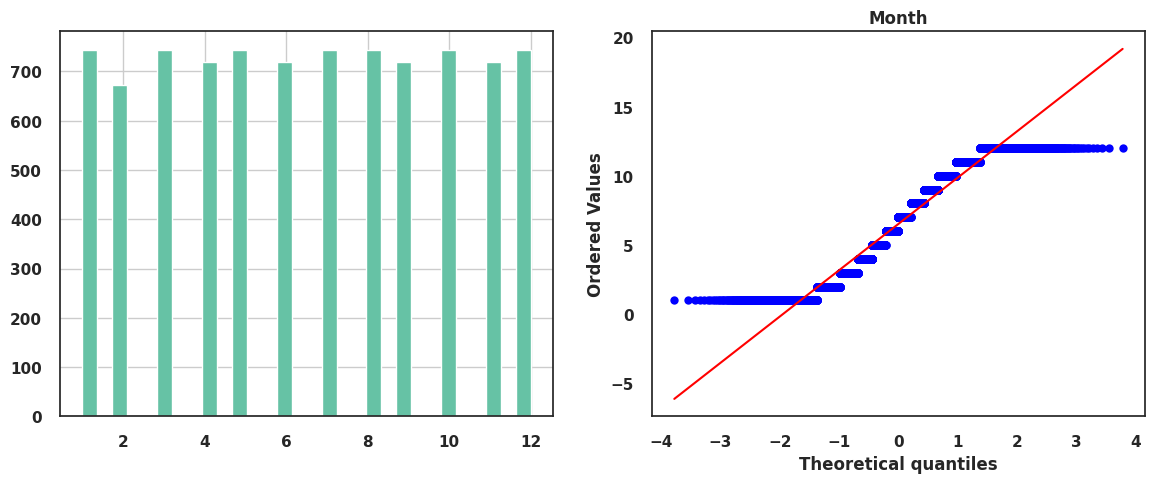

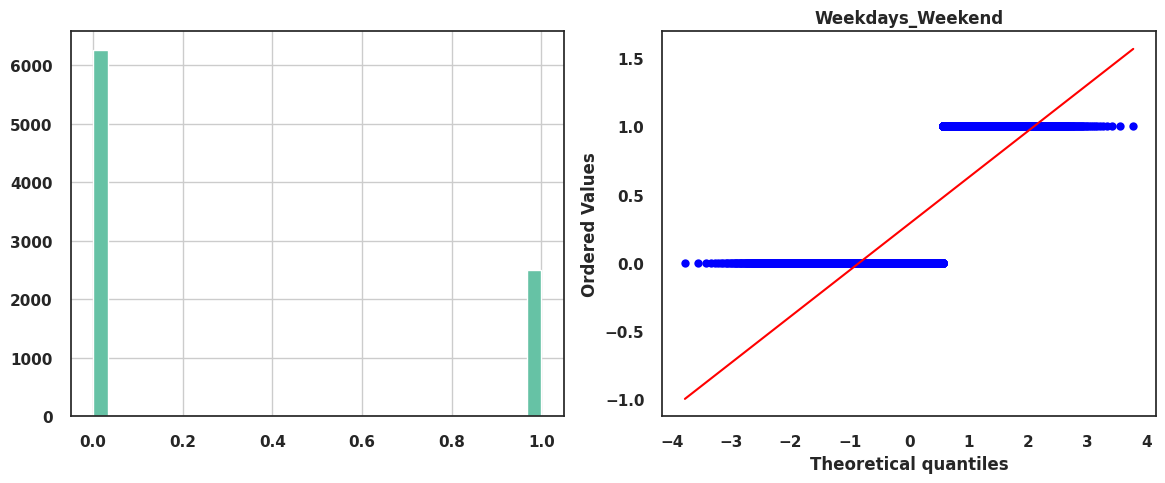

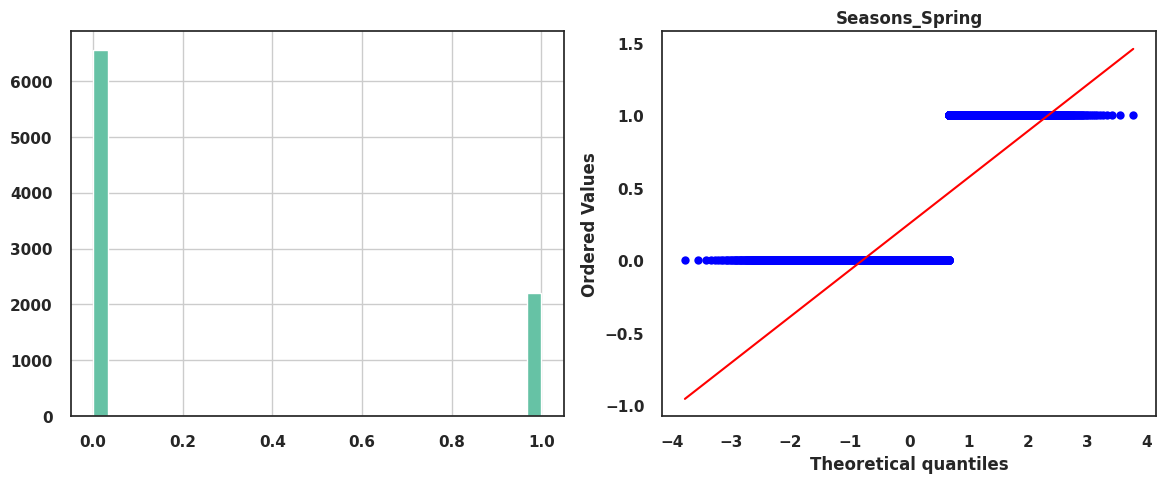

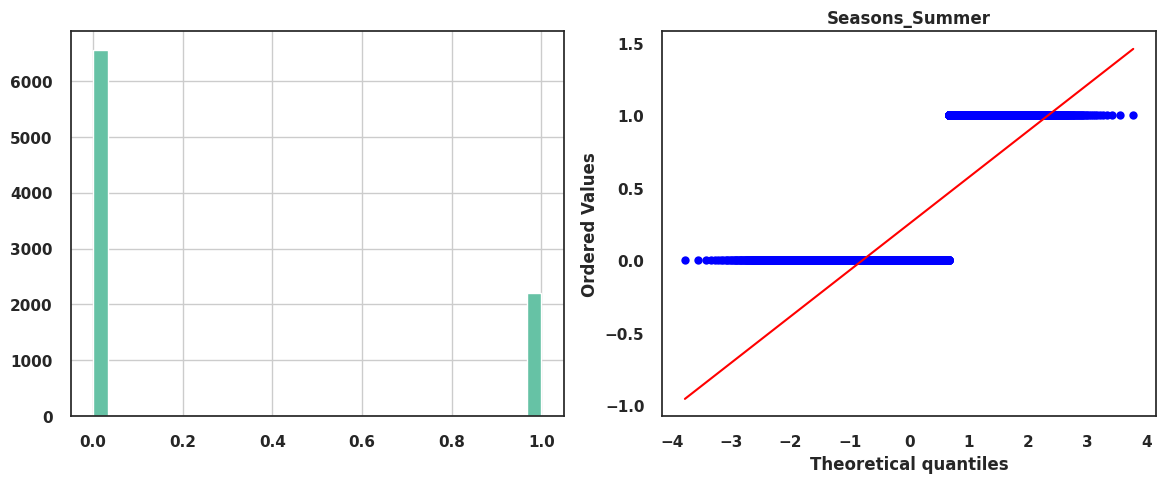

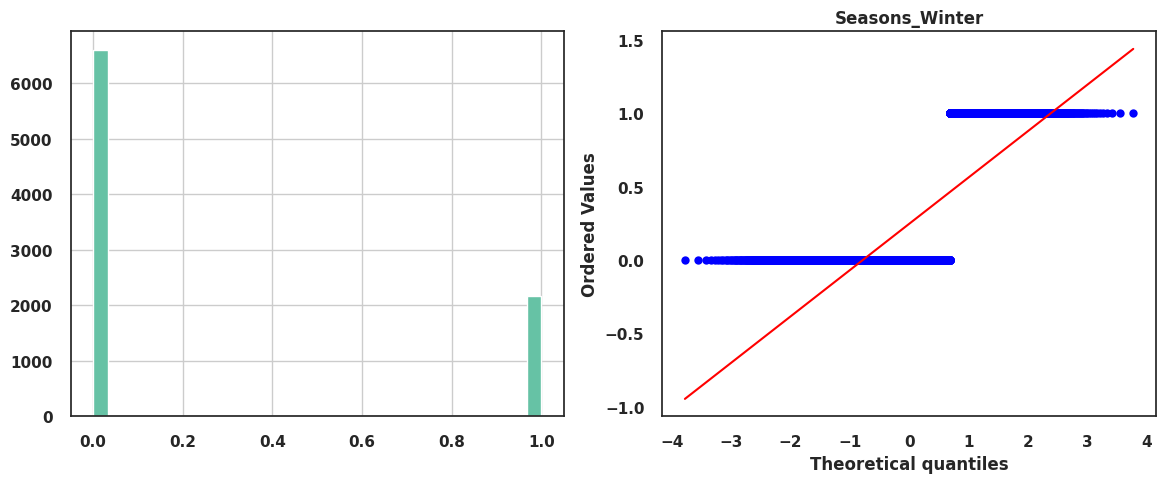

In [209]:
#vizualization
for variable in non_symmetric_feature:
  sns.set_context('notebook')
  plt.figure(figsize=(14,5))
  plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
  df[variable].hist(bins=30)

  ##QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist='norm',plot=plt)
  plt.title(variable)
  plt.show()
  print('='*120)

⚡ Since applying transformation on dependent variable rented bike count, it may affect the interpretability of the model. For example, if applied a log transformation to the dependent variable, the coefficients of the model will be interpreted in terms of the log scale, rather than the original scale.

In [210]:
# Transform Your data
df['Wind_speed']=np.cbrt(df['Wind_speed'])
df['Rented_Bike_Count']=np.sqrt(df['Rented_Bike_Count'])

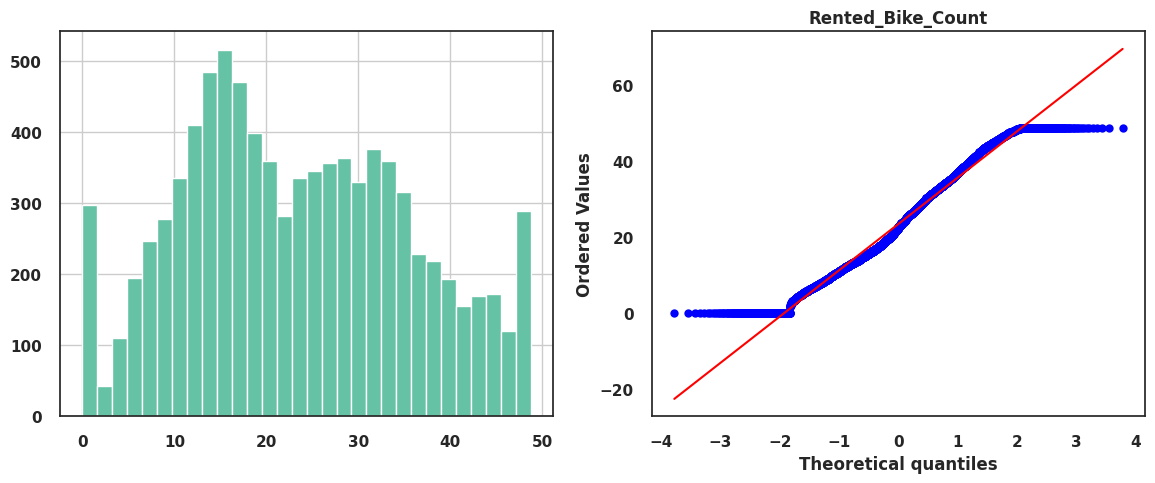

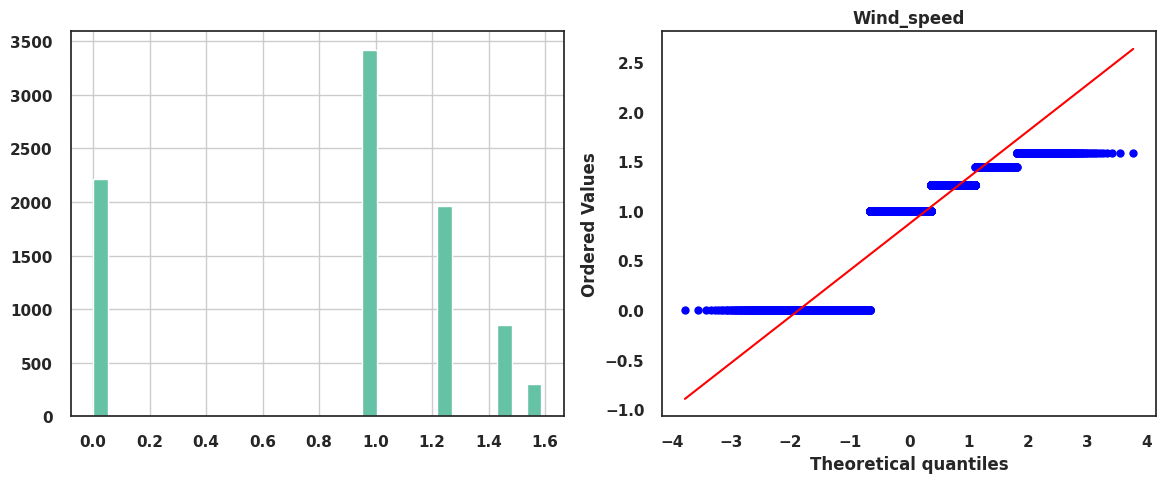

In [211]:
# Visualizing code of hist plot for each columns to know the data distibution
for col in non_symmetric_feature:
  # if (col == 'Wind_speed'):
  if (col == 'Wind_speed') | (col == 'Rented_Bike_Count'):
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
    df[col].hist(bins=30)

    ##QQ plot
    plt.subplot(1,2,2)
    stats.probplot(df[col], dist='norm',plot=plt)
    plt.title(col)
    plt.show()

Transformed windspeed using cube root and rented bike count with square root and no other transformation required, as for some non symmetric methods when transformation was applied some changed from right to left skewed, hence ignoring transformation.

The purpose of transformation is to convert the values of the dataset's numeric columns to a standard scale without distorting the distinctions between different value ranges or omitting crucial details. Transformation can be achieved using different techniques i.e., either taking log, square root or cuberoot for the value.

* square-root for moderate skew: sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

* log for greater skew: log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

* inverse for severe skew: 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

* Linearity and heteroscedasticity: First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

### 6. Data Splitting

In [212]:
# Split your data to train and test. Choose Splitting ratio wisely.
 # split into 80:20 ratio
X = df.drop("Rented_Bike_Count",axis=1)
y = df["Rented_Bike_Count"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3, random_state = 3)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (6132, 13)
Number transactions y_train dataset:  (6132,)
Number transactions X_test dataset:  (2628, 13)
Number transactions y_test dataset:  (2628,)


##### What data splitting ratio have you used and why?

In this case I have used 70:30 split as splitting in any ratio 80/20 or 70/30 deos not affect unless there is less values in dataset. However, there are two competing concerns: with less training data, parameter estimates have greater variance. With less testing data, performance statistic will have greater variance. it is best to divide data such that neither the variance in the training set nor the variance in the test set is too high.

Example : If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

### 7. Data Scaling

Note - We use scaling on the data after Train-test Split because of the Data Leaking issue from the Validation/Test to the Traning set (because the scaler would learn from the to-be test set too).

In [213]:
# Scaling your data
# Checking the data
df.head()

Rented_Bike_Count  Hour  Temperature  Wind_speed  Solar_Radiation  \
0              15.94     0           -5        1.26                0   
1              14.28     1           -5        0.00                0   
2              13.15     2           -6        1.00                0   
3              10.34     3           -6        0.00                0   
4               8.83     4           -6        1.26                0   

   Rainfall  Snowfall  Holiday  Functioning_Day  Month  Weekdays_Weekend  \
0         0         0        0                1     12                 0   
1         0         0        0                1     12                 0   
2         0         0        0                1     12                 0   
3         0         0        0                1     12                 0   
4         0         0        0                1     12                 0   

   Seasons_Spring  Seasons_Summer  Seasons_Winter  
0               0               0               1  
1               0               0               1  
2               0               0               1  
3               0               0               1  
4               0               0               1

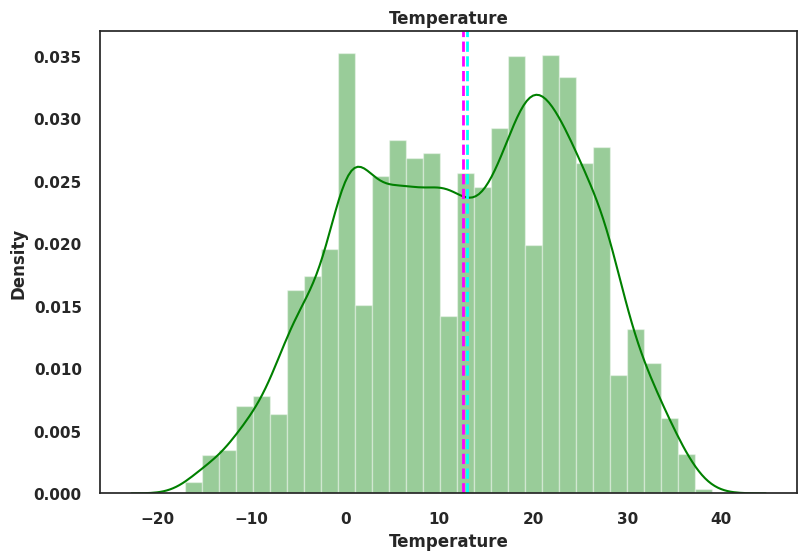

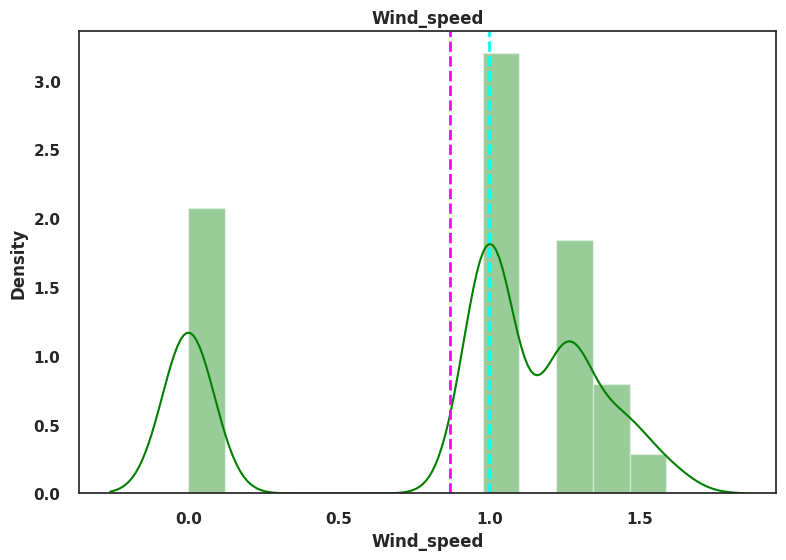

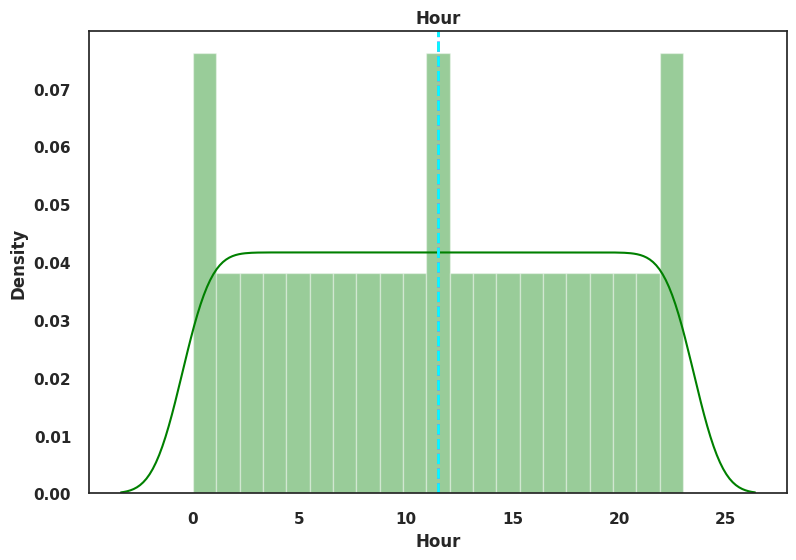

In [214]:
# Visualizing code of hist plot for each columns to know the data distibution
for col in ['Temperature','Wind_speed','Hour']:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col],color='green')
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()

In [215]:
# Transforming data
# Here if you don't apply scaling still we will get almost similar results.
# for its a good practice to apply scaling to the linear regression models.
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

##### Which method have you used to scale you data and why?

**I have used the MinMaxScaler here for scaling/Transforming the data.**

When we are using an algorithm that assumes your features have a similar range, we should use feature scaling.

If the ranges of features differ much then we should use feature scaling. If the range does not vary a lot like one of them is between 0 and 2 and the other one is between -1 and 0.5 then we can leave them as it's. However, we should use feature scaling if the ranges are, for example, between -2 and 2 and between -100 and 100.

Use Standardization when your data follows Gaussian distribution.
Use Normalization when your data does not follow Gaussian distribution.

In my data few of the features were having large difference in distribution, that's why, I would have used standardization using standardscaler on windspeed as it showed normal distribution and normalization using minmaxscaler on others if I scaled the data before spliting.


### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

This dataset doesnot need any dimensionality reduction.

Dimensionality reduction is a technique that is used to reduce the number of features in a dataset. It is often used when the number of features is very large, as this can lead to problems such as overfitting and slow computation. There are a variety of techniques that can be used for dimensionality reduction, such as principal component analysis (PCA) and singular value decomposition (SVD).

There are several reasons why dimensionality reduction might be useful. One reason is that it can help to reduce the size of a dataset, which can be particularly useful when the dataset is very large. It can also help to improve the performance of machine learning models by reducing the number of features that the model has to consider, which can lead to faster computation and better generalization to new data.

Another reason to use dimensionality reduction is to reduce the curse of dimensionality, which refers to the fact that as the number of dimensions increases, the volume of the space increases exponentially. This can lead to problems such as the nearest neighbor search becoming less effective, as the distances between points become much larger. Dimensionality reduction can help to reduce the curse of dimensionality by reducing the number of dimensions in the data.

Finally, dimensionality reduction can also be useful for visualizing high-dimensional data. It can be difficult to visualize data in more than three dimensions, so reducing the number of dimensions can make it easier to understand the patterns in the data.

In [216]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Not applicable

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Imbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.

Imbalance means that the number of data points available for different the classes is different:
If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In our case it is **not required** and imbalanced class like functioning day and holiday are already removed. Secondly, class imbalance applies to classification problems, where the goal is to predict a class label. In a regression problem, where the goal is to predict a continuous numerical target value, class imbalance is generally not a concern.

In [217]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 **Linear Regression**

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where $$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and
$$\beta_0,\beta_1,\beta_2.....$$
 are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using  a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

1. No multicollinearity in the dataset.

2. Independent variables should show linear relationship with dv.

3. Residual mean should be 0 or close to 0.

4. There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.



Let us now implement our first model.
We will be using LinearRegression from scikit library.


In [218]:
# ML Model - 1 Implementation
lrmodel = LinearRegression()
# Fit the Algorithm
lrmodel.fit(X_train, y_train)

LinearRegression()

In [219]:
#score
lrmodel.score(X_train, y_train)

0.6465738224579624

In [220]:
# Checking the coefficients
lrmodel.coef_

array([ 13.0797363 ,  25.01694664,   2.19482598,   1.07301266,
       -23.69921727,  -2.56201567,  -3.01199105,  29.26319604,
         1.18224183,  -1.29671984,  -2.52195096,  -3.57643982,
        -6.67397192])

In [221]:
# Checking the intercept value
lrmodel.intercept_

-22.308416293684907

In [222]:
# Predict on the model
y_pred_train = lrmodel.predict(X_train)
y_pred = lrmodel.predict(X_test)

In [223]:
# get dataframe for x columns and coefficient
pd.DataFrame(lrmodel.coef_,X.columns, columns=['Coefficient'])

Coefficient
Hour                    13.08
Temperature             25.02
Wind_speed               2.19
Solar_Radiation          1.07
Rainfall               -23.70
Snowfall                -2.56
Holiday                 -3.01
Functioning_Day         29.26
Month                    1.18
Weekdays_Weekend        -1.30
Seasons_Spring          -2.52
Seasons_Summer          -3.58
Seasons_Winter          -6.67

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [224]:
# Metric Score chart for train
r2_train = r2(y_train, y_pred_train)
adj_r2_train = 1-(1-r2(np.square(y_train), np.square(y_pred_train)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train = mse(y_train, y_pred_train)
RMSE_train = np.sqrt(MSE_train)
MAE_train = mae(y_train, y_pred_train)

In [225]:
# Metric Score chart for test
r2_test = r2(y_test, y_pred)
adj_r2_test = 1-(1-r2(np.square(y_test), np.square(y_pred)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test = mse(y_test, y_pred)
RMSE_test = np.sqrt(MSE_test)
MAE_test = mae(y_test, y_pred)

In [226]:
data = [
    {
        'Model': 'Linear_Regression',
        'R2_train': r2_train,
        'R2_test': r2_test,
        'Adjusted_R2_train': adj_r2_train,
        'Adjusted_R2_test': adj_r2_test,
        'MAE_train': MAE_train,
        'MAE_test': MAE_test,
        'RMSE_train': RMSE_train,
        'RMSE_test': RMSE_test
    }
]

eval_df = pd.DataFrame(data)
eval_df

Model  R2_train  R2_test  Adjusted_R2_train  Adjusted_R2_test  \
0  Linear_Regression      0.65     0.64               0.57              0.57   

   MAE_train  MAE_test  RMSE_train  RMSE_test  
0       5.60      5.68        7.30       7.44

In [227]:
# define a fucntion to plot predicted y values and actual y values
def plot_Pred_vs_actual(y_pred,y_test):
  ''' Visualize predicted values with actaul values'''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [228]:
# define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred,y_test):
  '''Plot scatter plot for y_test values and
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [229]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
 #Mean of residuals should be zero or close to 0 as much as possible. It is done to check whether our line is actually the line of “best fit”
def Residual_distPlot(y_pred,y_test):
  '''Checks the distribution of residals)'''

  plt.figure(figsize=(10,5))
  sns.distplot(x=y_test-y_pred)

  plt.title("Residual Distribution")


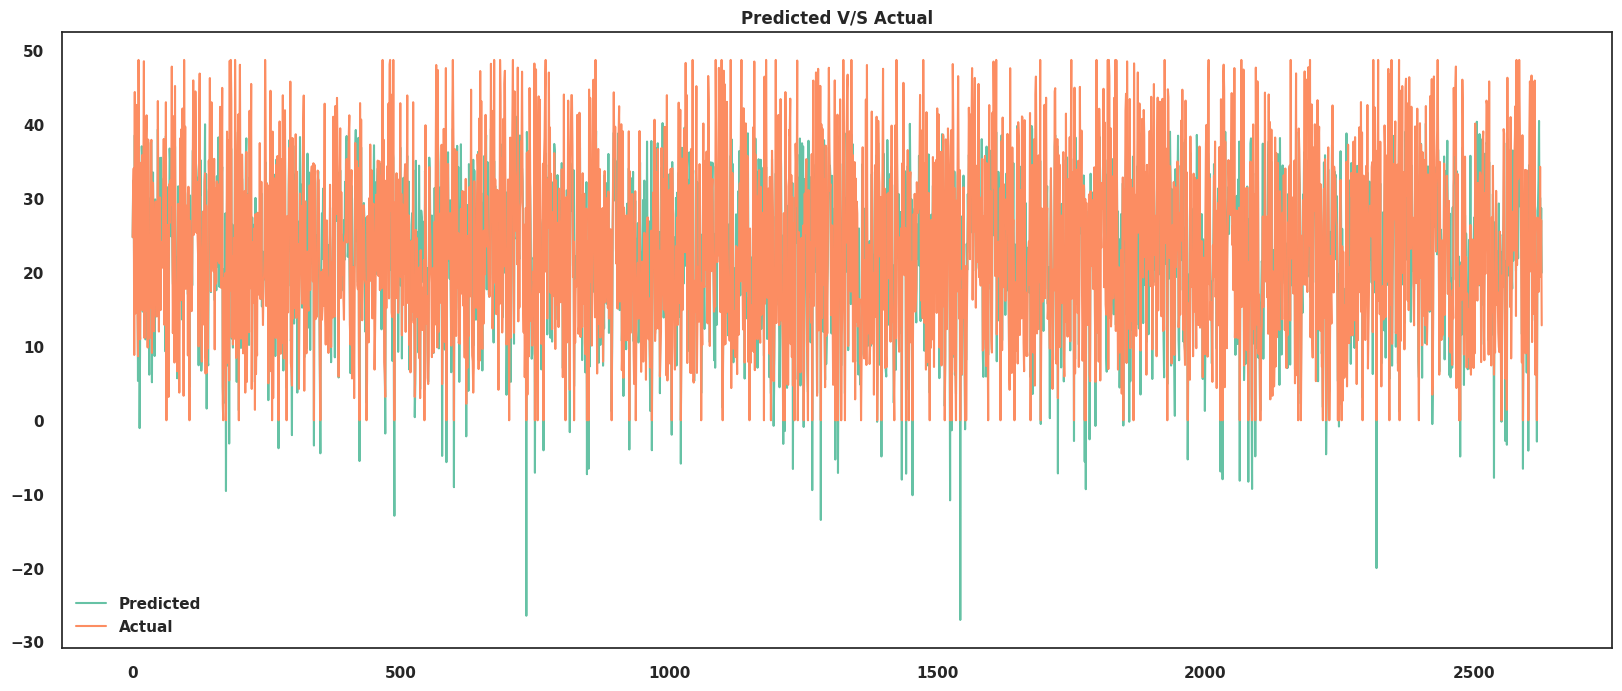

In [230]:
plot_Pred_vs_actual(y_pred,y_test)


Text(0.5, 0, 'y_predicted')

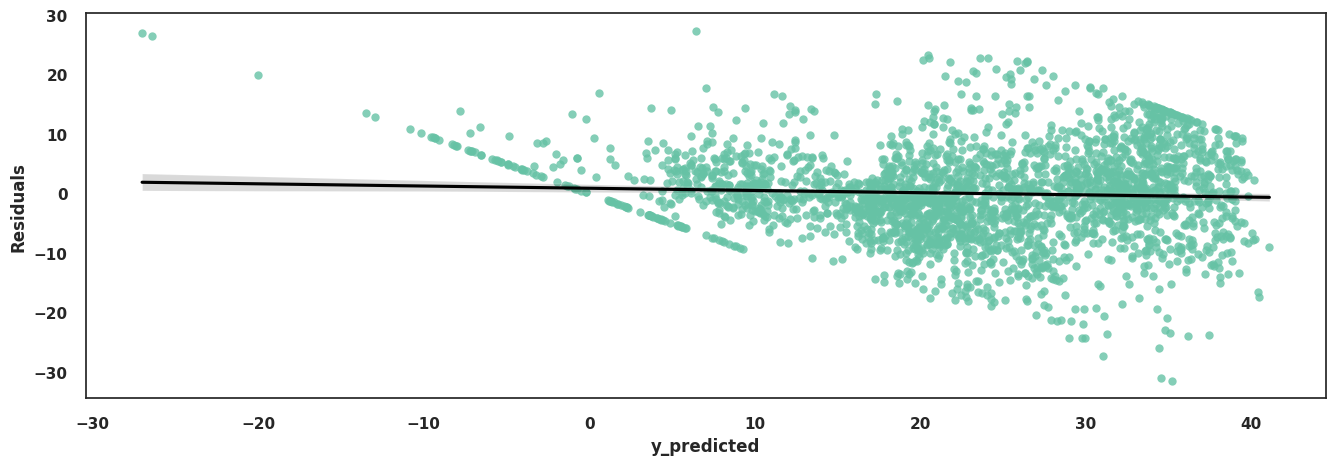

In [231]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

From the above plot of Residuals, we can kind of say this is not homoscedastic because it is following a cone shape. It indicates that the assumption of homoscedasticity has been violated

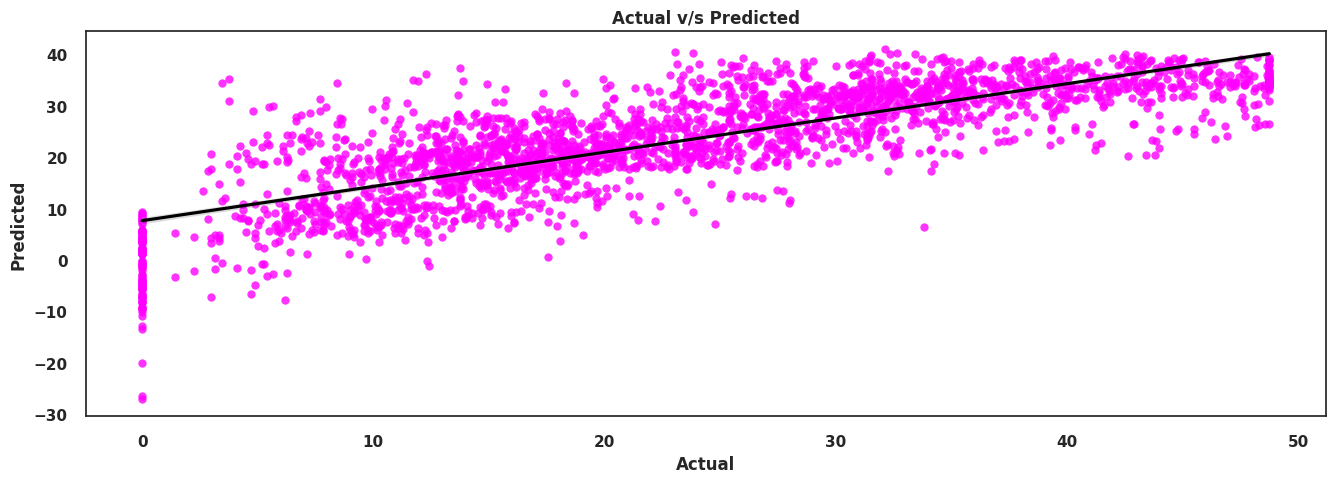

In [232]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

The distribution is linear. That means our model is performing well.

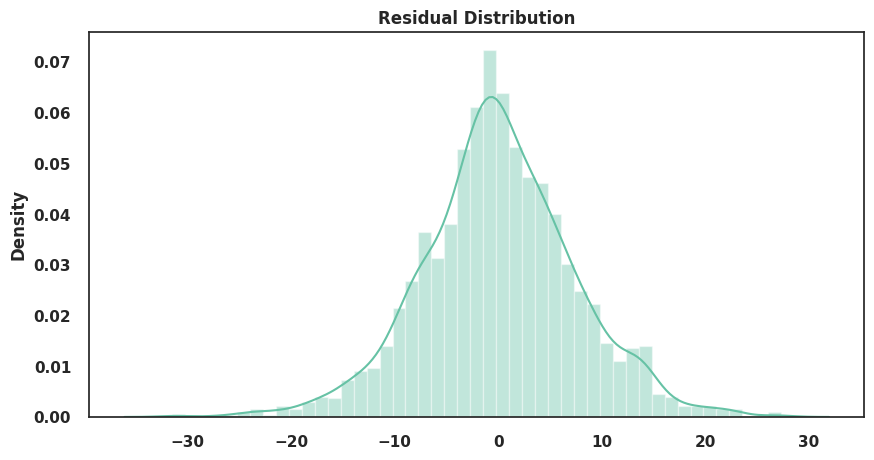

In [233]:
#Distribution of Residuals
Residual_distPlot(y_pred,y_test)

Here we got very nice bell shaped curve of the residuals. We can conclude that the model is good because the distribution is normal

### ML Model - 2 Random Forest


Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [234]:
# ML Model - 2 Implementation
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
y_pred_train3 = rf_model.predict(X_train)
y_pred3 = rf_model.predict(X_test)

In [235]:
rf_model.score(X_train,y_train)

0.9779256545400254

In [236]:
rf_model.score(X_test,y_test)

0.8880142926582445

In [237]:
# Metric Score chart for train
r2_train3 = r2(y_train, y_pred_train3)
adj_r2_train3 = 1-(1-r2(np.square(y_train), np.square(y_pred_train3)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train3 = mse(y_train, y_pred_train3)
RMSE_train3 = np.sqrt(MSE_train3)
MAE_train3 = mae(y_train, y_pred_train3)

# Metric Score chart for test
r2_test3 = r2(y_test, y_pred3)
adj_r2_test3 = 1-(1-r2(np.square(y_test), np.square(y_pred3)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test3 = mse(y_test, y_pred3)
RMSE_test3 = np.sqrt(MSE_test3)
MAE_test3 = mae(y_test, y_pred3)

new_row = {
        'Model': 'RandomForestRegressor',
        'R2_train': r2_train3,
        'R2_test': r2_test3,
        'Adjusted_R2_train': adj_r2_train3,
        'Adjusted_R2_test': adj_r2_test3,
        'MAE_train': MAE_train3,
        'MAE_test': MAE_test3,
        'RMSE_train': RMSE_train3,
        'RMSE_test': RMSE_test3
    }
new_df = pd.DataFrame(new_row, index=[0])

# Now you can append new rows to the result DataFrame
eval_df = pd.concat([eval_df, new_df], ignore_index=True)

In [238]:
# metric score chart
eval_df

Model  R2_train  R2_test  Adjusted_R2_train  \
0      Linear_Regression      0.65     0.64               0.57   
1  RandomForestRegressor      0.98     0.89               0.98   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.57       5.60      5.68        7.30       7.44  
1              0.88       1.02      2.41        1.83       4.15

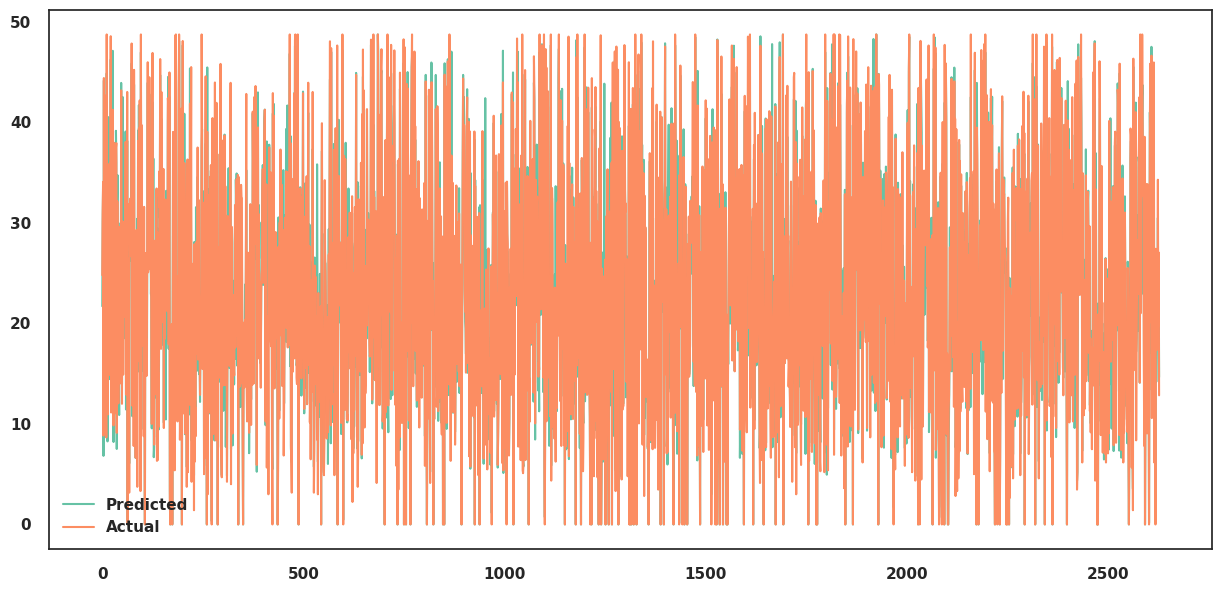

In [239]:
# Visualizing evaluation Metric Score chart
#Visualization
# Plot between actual target variable vs Predicted one
sns.set_context("notebook");
plt.figure(figsize=(15,7))
plt.plot(np.array(y_pred3))
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0, 'Relative Importance')

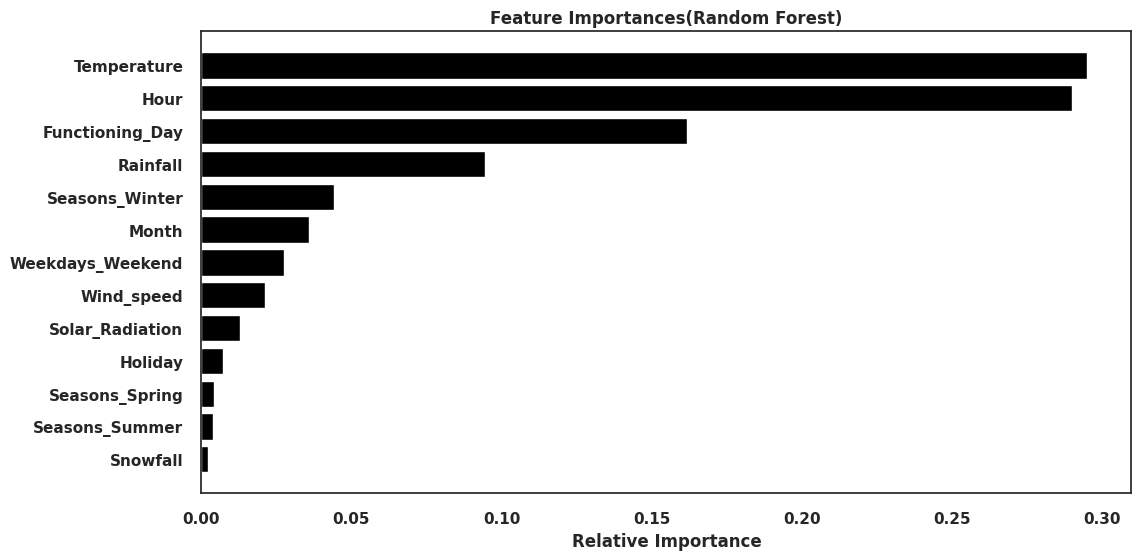

In [240]:
# checking Feature imporatance
imp_variables=X.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Random Forest)')
plt.barh(range(len(indices)), importances[indices], color='black', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

#### 2. Cross- Validation & Hyperparameter Tuning

In [241]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='r2')


# Fit the Algorithm
rf_grid.fit(X_train,y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.5s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='r2', verbose=2)

In [242]:
#best parameter
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Best: 0.793951 using {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 100, 'n_estimators': 100}


In [243]:
# Predict on the model
# Making predictions on train and test data
y_pred_train4 = rf_grid.predict(X_train)
y_pred4 = rf_grid.predict(X_test)

In [244]:
# Metric Score chart for train
r2_train4 = r2(y_train, y_pred_train4)
adj_r2_train4 = 1-(1-r2(np.square(y_train), np.square(y_pred_train4)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train4 = mse(y_train, y_pred_train4)
RMSE_train4 = np.sqrt(MSE_train4)
MAE_train4 = mae(y_train, y_pred_train4)

# Metric Score chart for test
r2_test4 = r2(y_test, y_pred4)
adj_r2_test4 = 1-(1-r2(np.square(y_test), np.square(y_pred4)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test4 = mse(y_test, y_pred4)
RMSE_test4 = np.sqrt(MSE_test4)
MAE_test4 = mae(y_test, y_pred4)

new_row = {
        'Model': 'RandomForestRegressor_Grid_CV',
        'R2_train': r2_train4,
        'R2_test': r2_test4,
        'Adjusted_R2_train': adj_r2_train4,
        'Adjusted_R2_test': adj_r2_test4,
        'MAE_train': MAE_train4,
        'MAE_test': MAE_test4,
        'RMSE_train': RMSE_train4,
        'RMSE_test': RMSE_test4
    }
new_df = pd.DataFrame(new_row, index=[0])

# Now you can append new rows to the result DataFrame
eval_df = df = pd.concat([eval_df, new_df], ignore_index=True)

In [245]:
#printing thi result
eval_df

Model  R2_train  R2_test  Adjusted_R2_train  \
0              Linear_Regression      0.65     0.64               0.57   
1          RandomForestRegressor      0.98     0.89               0.98   
2  RandomForestRegressor_Grid_CV      0.81     0.80               0.79   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.57       5.60      5.68        7.30       7.44  
1              0.88       1.02      2.41        1.83       4.15  
2              0.78       3.64      3.81        5.30       5.57

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before hyperparameter tuning model was overfitting as model has a very large difference in training and test score, which was reduced from 0.98 in training to 0.81 and test result from 0.89 to 0.80 which is also has slight difference but overall model is efficient now compared to earlier.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

In the context of a linear regression model,I used the following evaluation metrics to assess the performance of the model and the business impact of the model:

* R2 score: The R2 score, also known as the coefficient of determination, is a measure of how well the model fits the data. It ranges from 0 to 1, with a higher value indicating a better fit. A high R2 score suggests that the model is able to explain a large portion of the variance in the data. In a business context, a high R2 score can indicate that the model is able to make accurate predictions, which could have a positive impact on decision-making and resource allocation.

* Adjusted R2 score: The adjusted R2 score is similar to the R2 score, but it adjusts for the number of variables in the model. A higher adjusted R2 score suggests that the model is able to explain a large portion of the variance in the data while also taking into account the complexity of the model. In a business context, a high adjusted R2 score can indicate that the model is able to make accurate predictions with a reasonable level of complexity, which could be more practical for deployment in a business setting.

* Mean absolute error (MAE): The MAE is a measure of the average absolute error of the model's predictions. It is calculated as the sum of the absolute differences between the predicted values and the actual values, divided by the number of predictions. In a business context, a low MAE can indicate that the model is making relatively small errors, which could be important if the model is being used to make important decisions or allocate resources.

* Root mean squared error (RMSE): The RMSE is a measure of the average squared error of the model's predictions. It is calculated as the square root of the mean squared error (MSE). In a business context, a low RMSE can indicate that the model is making relatively small errors, which could be important if the model is being used to make important decisions or allocate resources.

### ML Model - 3

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [246]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
xg_model = XGBRegressor(objective= 'reg:squarederror')

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

y_pred_train5 = xg_models.predict(X_train)
y_pred5 = xg_models.predict(X_test)

In [247]:
# # Metric Score chart for train
r2_train5 = r2(y_train, y_pred_train5)
adj_r2_train5 = 1-(1-r2(np.square(y_train), np.square(y_pred_train5)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train5 = mse(y_train, y_pred_train5)
RMSE_train5 = np.sqrt(MSE_train5)
MAE_train5 = mae(y_train, y_pred_train5)

# Metric Score chart for test
r2_test5 = r2(y_test, y_pred5)
adj_r2_test5 = 1-(1-r2(np.square(y_test), np.square(y_pred5)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test5 = mse(y_test, y_pred5)
RMSE_test5 = np.sqrt(MSE_test5)
MAE_test5 = mae(y_test, y_pred5)

new_row = {
        'Model': 'XGBRegressor',
        'R2_train': r2_train5,
        'R2_test': r2_test5,
        'Adjusted_R2_train': adj_r2_train5,
        'Adjusted_R2_test': adj_r2_test5,
        'MAE_train': MAE_train5,
        'MAE_test': MAE_test5,
        'RMSE_train': RMSE_train5,
        'RMSE_test': RMSE_test5
    }
new_df = pd.DataFrame(new_row, index=[0])

# Now you can append new rows to the result DataFrame
eval_df = df = pd.concat([eval_df, new_df], ignore_index=True)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [248]:
# Visualizing evaluation Metric Score chart
eval_df

Model  R2_train  R2_test  Adjusted_R2_train  \
0              Linear_Regression      0.65     0.64               0.57   
1          RandomForestRegressor      0.98     0.89               0.98   
2  RandomForestRegressor_Grid_CV      0.81     0.80               0.79   
3                   XGBRegressor      0.95     0.90               0.95   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.57       5.60      5.68        7.30       7.44  
1              0.88       1.02      2.41        1.83       4.15  
2              0.78       3.64      3.81        5.30       5.57  
3              0.89       1.63      2.35        2.70       3.95

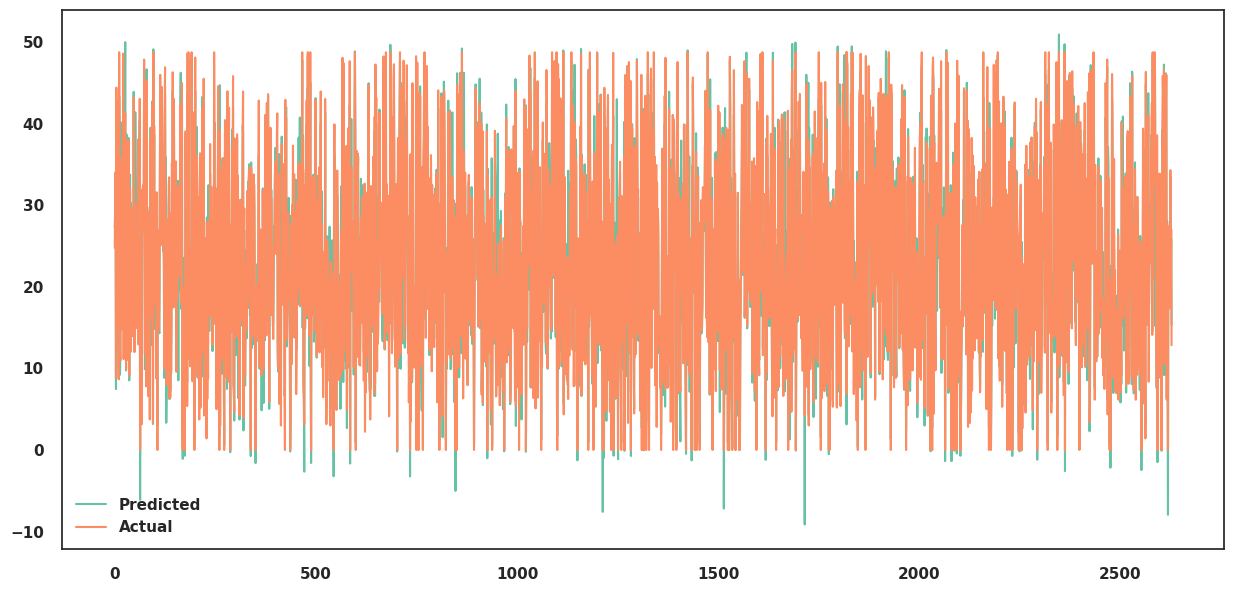

In [249]:
#Visualization
# Plot between actual target variable vs Predicted one
sns.set_context("notebook");
plt.figure(figsize=(15,7))
plt.plot(np.array(y_pred5))
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [250]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
xg_model = XGBRegressor(objective = 'reg:squarederror')

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='r2')

xg_grid1=xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, min_sam

In [251]:
# Predict on the model
# Making predictions on train and test data

y_pred_train6= xg_grid1.predict(X_train)
y_pred6 = xg_grid1.predict(X_test)

In [252]:
# # Metric Score chart for train
r2_train6 = r2(y_train, y_pred_train6)
adj_r2_train6 = 1-(1-r2(np.square(y_train), np.square(y_pred_train6)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train6 = mse(y_train, y_pred_train6)
RMSE_train6 = np.sqrt(MSE_train6)
MAE_train6 = mae(y_train, y_pred_train6)

# Metric Score chart for test
r2_test6 = r2(y_test, y_pred6)
adj_r2_test6 = 1-(1-r2(np.square(y_test), np.square(y_pred6)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test6 = mse(y_test, y_pred6)
RMSE_test6 = np.sqrt(MSE_test6)
MAE_test6 = mae(y_test, y_pred6)

new_row = {
        'Model': 'XGBRegressor_GridCV',
        'R2_train': r2_train6,
        'R2_test': r2_test6,
        'Adjusted_R2_train': adj_r2_train6,
        'Adjusted_R2_test': adj_r2_test6,
        'MAE_train': MAE_train6,
        'MAE_test': MAE_test6,
        'RMSE_train': RMSE_train6,
        'RMSE_test': RMSE_test6
    }
new_df = pd.DataFrame(new_row, index=[0])

# Now you can append new rows to the result DataFrame
eval_df = df = pd.concat([eval_df, new_df], ignore_index=True)

In [253]:
#best parameter
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Best: 0.793951 using {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 100, 'n_estimators': 100}


In [254]:
# Predict on the model
# Making predictions on train and test data
y_pred_train4 = rf_grid.predict(X_train)
y_pred4 = rf_grid.predict(X_test)

In [255]:
# Metric Score chart for train
r2_train4 = r2(y_train, y_pred_train4)
adj_r2_train4 = 1-(1-r2(np.square(y_train), np.square(y_pred_train4)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train4 = mse(y_train, y_pred_train4)
RMSE_train4 = np.sqrt(MSE_train4)
MAE_train4 = mae(y_train, y_pred_train4)

# Metric Score chart for test
r2_test4 = r2(y_test, y_pred4)
adj_r2_test4 = 1-(1-r2(np.square(y_test), np.square(y_pred4)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test4 = mse(y_test, y_pred4)
RMSE_test4 = np.sqrt(MSE_test4)
MAE_test4 = mae(y_test, y_pred4)

new_row = {
        'Model': 'RandomForestRegressor_Grid_CV',
        'R2_train': r2_train4,
        'R2_test': r2_test4,
        'Adjusted_R2_train': adj_r2_train4,
        'Adjusted_R2_test': adj_r2_test4,
        'MAE_train': MAE_train4,
        'MAE_test': MAE_test4,
        'RMSE_train': RMSE_train4,
        'RMSE_test': RMSE_test4
    }
new_df = pd.DataFrame(new_row, index=[0])

# Now you can append new rows to the result DataFrame
eval_df = df = pd.concat([eval_df, new_df], ignore_index=True)

In [256]:
eval_df

Model  R2_train  R2_test  Adjusted_R2_train  \
0              Linear_Regression      0.65     0.64               0.57   
1          RandomForestRegressor      0.98     0.89               0.98   
2  RandomForestRegressor_Grid_CV      0.81     0.80               0.79   
3                   XGBRegressor      0.95     0.90               0.95   
4            XGBRegressor_GridCV      0.93     0.90               0.93   
5  RandomForestRegressor_Grid_CV      0.81     0.80               0.79   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.57       5.60      5.68        7.30       7.44  
1              0.88       1.02      2.41        1.83       4.15  
2              0.78       3.64      3.81        5.30       5.57  
3              0.89       1.63      2.35        2.70       3.95  
4              0.89       1.92      2.38        3.17       3.98  
5              0.78       3.64      3.81        5.30       5.57

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [257]:
eval_df

Model  R2_train  R2_test  Adjusted_R2_train  \
0              Linear_Regression      0.65     0.64               0.57   
1          RandomForestRegressor      0.98     0.89               0.98   
2  RandomForestRegressor_Grid_CV      0.81     0.80               0.79   
3                   XGBRegressor      0.95     0.90               0.95   
4            XGBRegressor_GridCV      0.93     0.90               0.93   
5  RandomForestRegressor_Grid_CV      0.81     0.80               0.79   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.57       5.60      5.68        7.30       7.44  
1              0.88       1.02      2.41        1.83       4.15  
2              0.78       3.64      3.81        5.30       5.57  
3              0.89       1.63      2.35        2.70       3.95  
4              0.89       1.92      2.38        3.17       3.98  
5              0.78       3.64      3.81        5.30       5.57

Hyperparameter tunning certainly showed a better result, r2 was remained same on test and mae and rmse was increasd. Mae increased from 2.35 to 2.38 and rmse from 3.95 to 3.98. Overall model show good result.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For the model and business point of view, I chose R2 abd RMSE as evaluation metrics.

* R2 score, also known as the coefficient of determination, is a measure of how well the model fits the data. It ranges from 0 to 1, with a higher value indicating a better fit. A high R2 score suggests that the model is able to explain a large portion of the variance in the data. In a business context, a high R2 score can indicate that the model is able to make accurate predictions, which could have a positive impact on decision-making and resource allocation.
* RMSE is a measure of the average squared error of the model's predictions. It is calculated as the square root of the mean squared error (MSE). In a business context, a low RMSE can indicate that the model is making relatively small errors, which could be important if the model is being used to make important decisions or allocate resources.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the results, I want to consider using the XGBRegressor_GridCV i.e., XGBRegressor with hyperparameter tunned model as final model. This model has the highest R2 values on both the training and test sets, which indicates that it is doing a good job of explaining the variance in the target variable. It also has the lowest MAE and RMSE values on the test set, which means that it is making relatively small and accurate predictions.

In [258]:
#final best result
eval_df.sort_values('R2_test',ascending = False)

Model  R2_train  R2_test  Adjusted_R2_train  \
3                   XGBRegressor      0.95     0.90               0.95   
4            XGBRegressor_GridCV      0.93     0.90               0.93   
1          RandomForestRegressor      0.98     0.89               0.98   
2  RandomForestRegressor_Grid_CV      0.81     0.80               0.79   
5  RandomForestRegressor_Grid_CV      0.81     0.80               0.79   
0              Linear_Regression      0.65     0.64               0.57   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
3              0.89       1.63      2.35        2.70       3.95  
4              0.89       1.92      2.38        3.17       3.98  
1              0.88       1.02      2.41        1.83       4.15  
2              0.78       3.64      3.81        5.30       5.57  
5              0.78       3.64      3.81        5.30       5.57  
0              0.57       5.60      5.68        7.30       7.44

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Text(0.5, 0, 'Relative Importance')

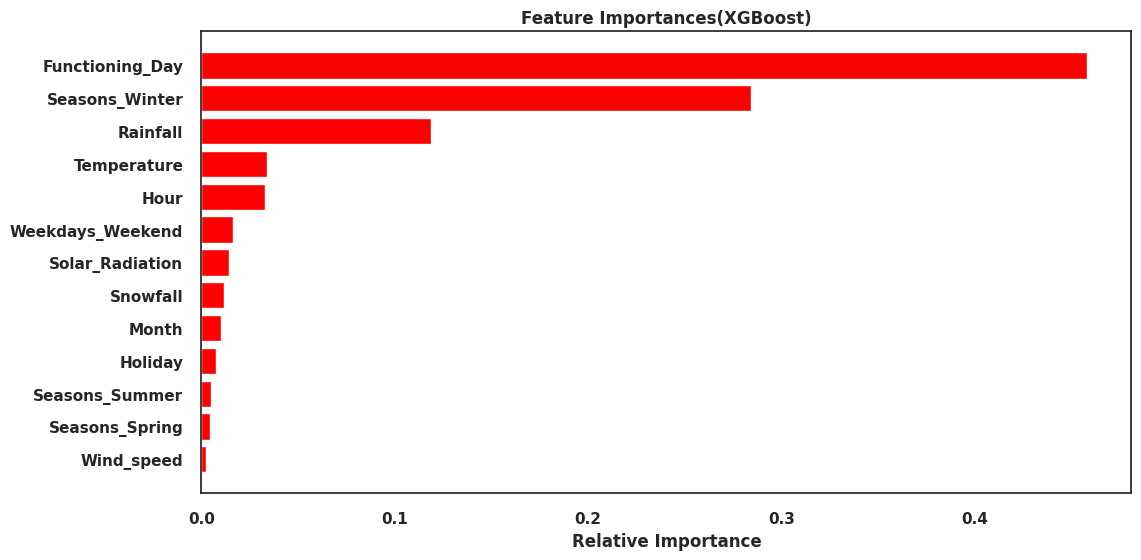

In [259]:
# checking Feature imporatance
imp_variables=X.columns
importances = xg_models.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(XGBoost)')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [260]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [261]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

We train a model to predict the number of rented bike count in given weather conditions. First, we do Exploratory Data Analysis on the data set. We look for null values that is not found in dataset and outliers and appropriately modify them. We also perform correlation analysis to extract out the important and relevant feature set and later perform feature engineering.

**The main goal of the project was to stablize bike demand at every hour. Based on the objective, it was found that:**

* **XGBoost with GridSearchCV** models shows promising result with R2 score of 0.90, therefore it can be used to solve this problem to an extent.

* Bike rental count is high during working days than on weekend.

* Bike demand shows peek around 8-9 AM in the morning and 6 - 7pm in the evening.

* People prefer to rent bike more in summer than in winter.

* Bike demand is more on clear days than on snowy or rainy days.

* Temperature range from 22 to 25(°C) has more demand for bike.

* 'Hour', 'Temperature(°C)', 'Humidity', 'Wind_speed','Visibility ', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'day of week ' regulates bike demand.

Although the current analysis may be insightful, it is important to note that the dataset is time-dependent and variables such as temperature, windspeed and solar radiation may not always remain consistent. As a result there may be situations where the model fails to perform well. As field of machine learning is constantly evolving, it is necessary to stay up-to-date with the latest developments and be prepared to handle unexpected scenarios. Maintaining a strong understanding of Machine Learning concepts will undoubtely provide an advantage in staying ahead in the future.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***